# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split


# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, roc_auc_score

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

## Data Overview

- Observations
- Sanity checks

In [2]:
# read the CSV data
data = pd.read_csv("INNHotelsGroup.csv")

In [3]:
# check info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [4]:
# determine descriptive statistics
data.describe().T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0

In [5]:
# check for duplicates
data.duplicated().sum()

0

In [6]:
# check for null values
data.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

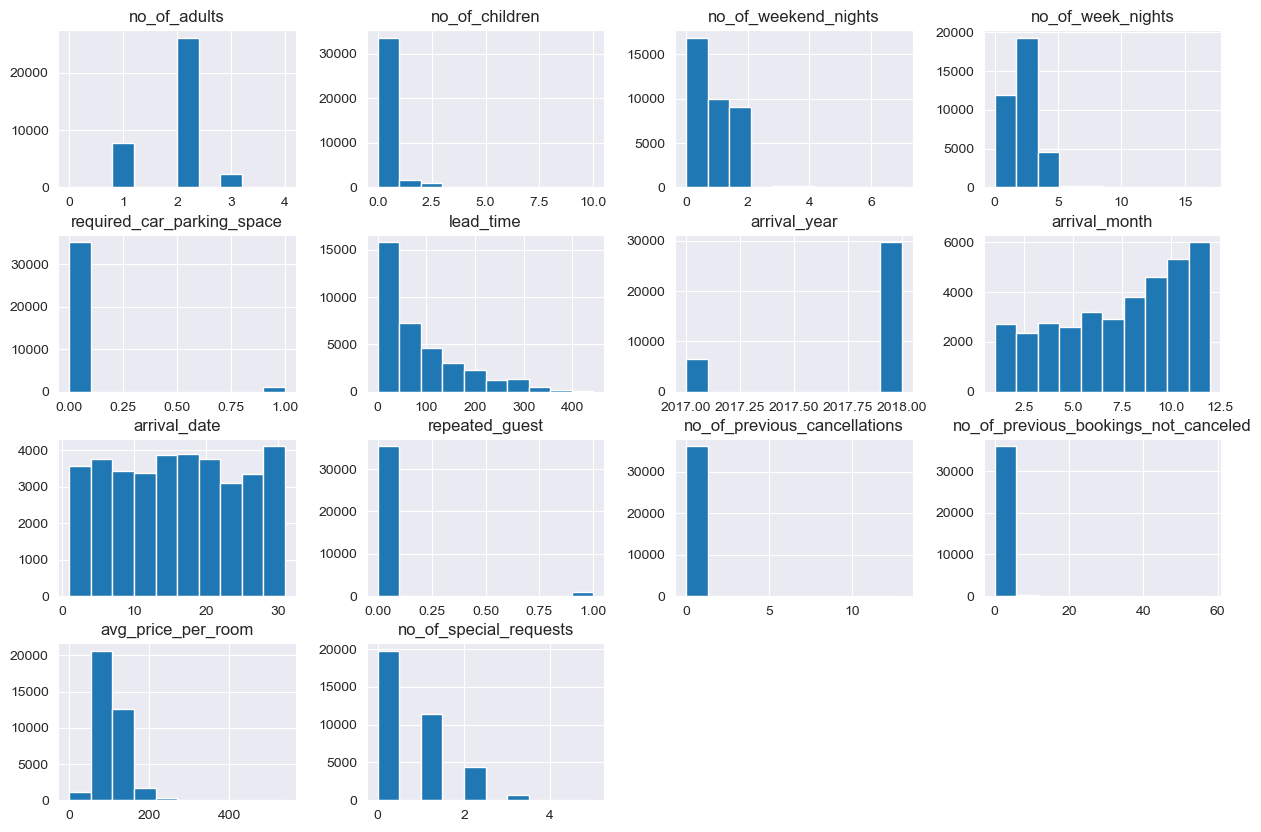

In [7]:
# run a histogram for each of the int variables
sns.set_style("darkgrid")
data.hist(figsize=(15, 10))
plt.show()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [8]:
# function from MLS
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [9]:
# function from MLS
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = str(p.get_height()) + " (" + str("{:.1f}%".format(
                100 * p.get_height() / total
            )) + ")"  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [10]:
# function from MLS
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [11]:
# function from MLS
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [12]:
# create a copy so that the source data is not harmed
df = data.copy()

### Univariate Analysis

### Booking_ID

#### Observations:

Booking ID is a an identifier column and therefore only contains unique values. There is no meaningful analysis that can be performed on this variable

### no_of_adults

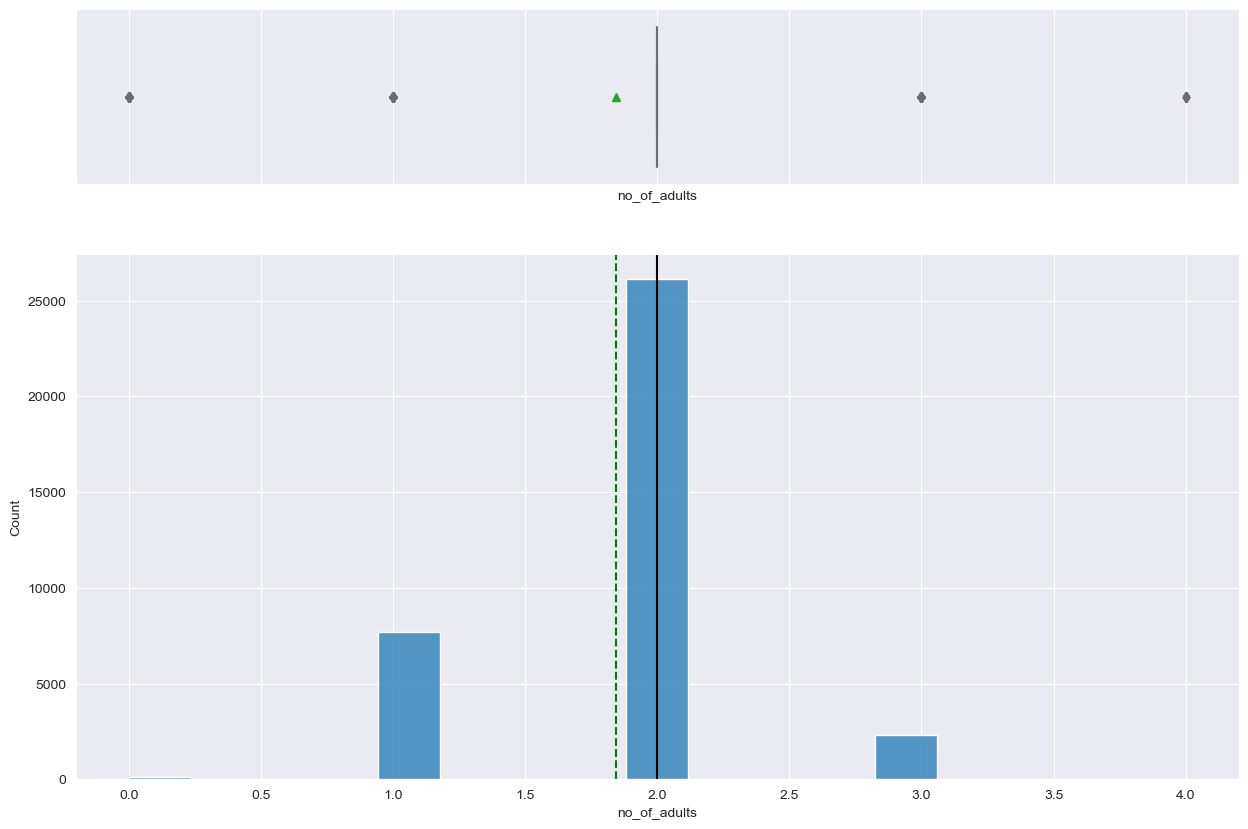

In [13]:
# perform a univariate analysis of the variable
histogram_boxplot(df,"no_of_adults")

In [14]:
# check the value counts
df.no_of_adults.value_counts()

2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64

#### Observations:

The highest frequency of number of adults per booking is 2 with a count of 26108, followed by 1(7695) and then 3(2317). 0 adults is barely visible on the histogram as it has only 139 counts and 4 adults does not show up at all as it has only 16 counts. 

### no_of_children

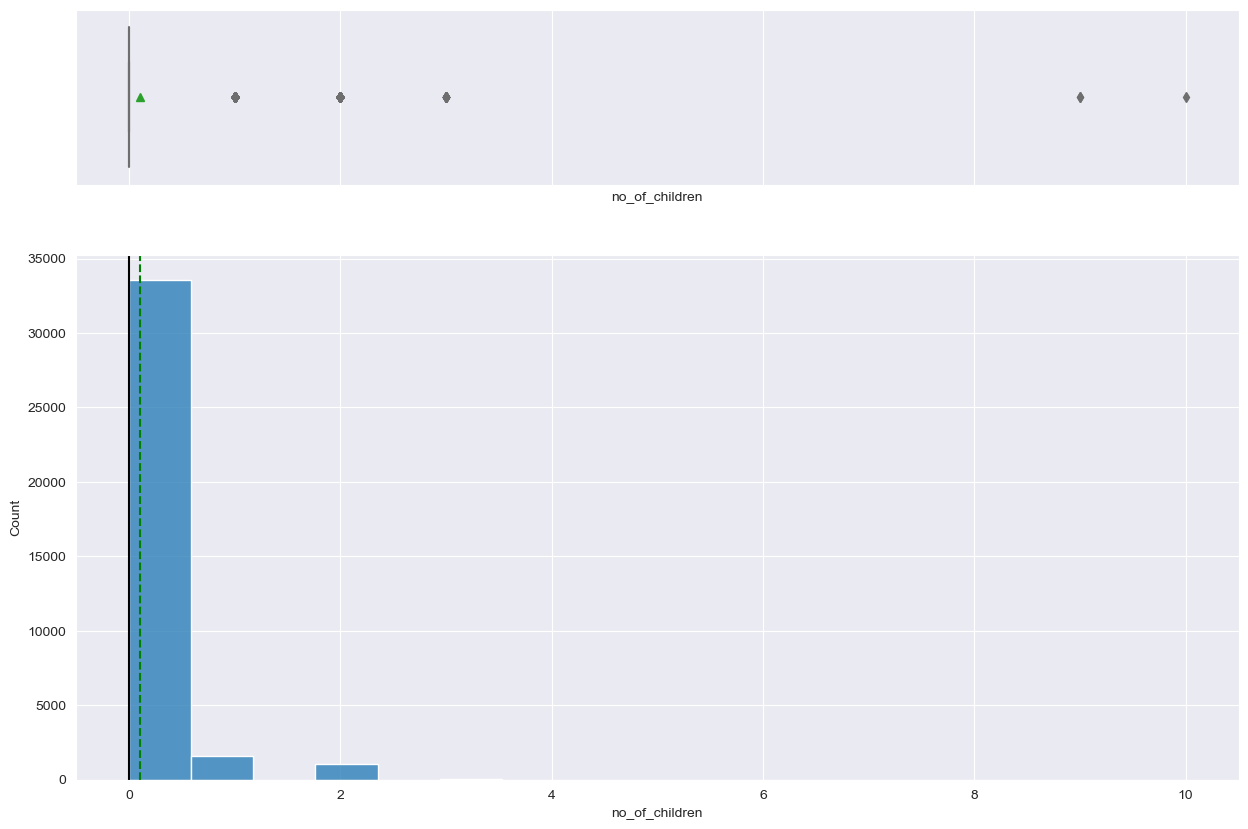

In [15]:
# perform a univariate analysis of the variable
histogram_boxplot(df,"no_of_children")

In [16]:
# check the value counts
df.no_of_children.value_counts()

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

#### Observations:

The histogram above shows that the highest frequency of number of children included in a hotel booking is 0 (33577), followed by 1(1618), 0(1058), 3(19), 9(2), and 10(1). 

### no_of_weekend_nights

0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64

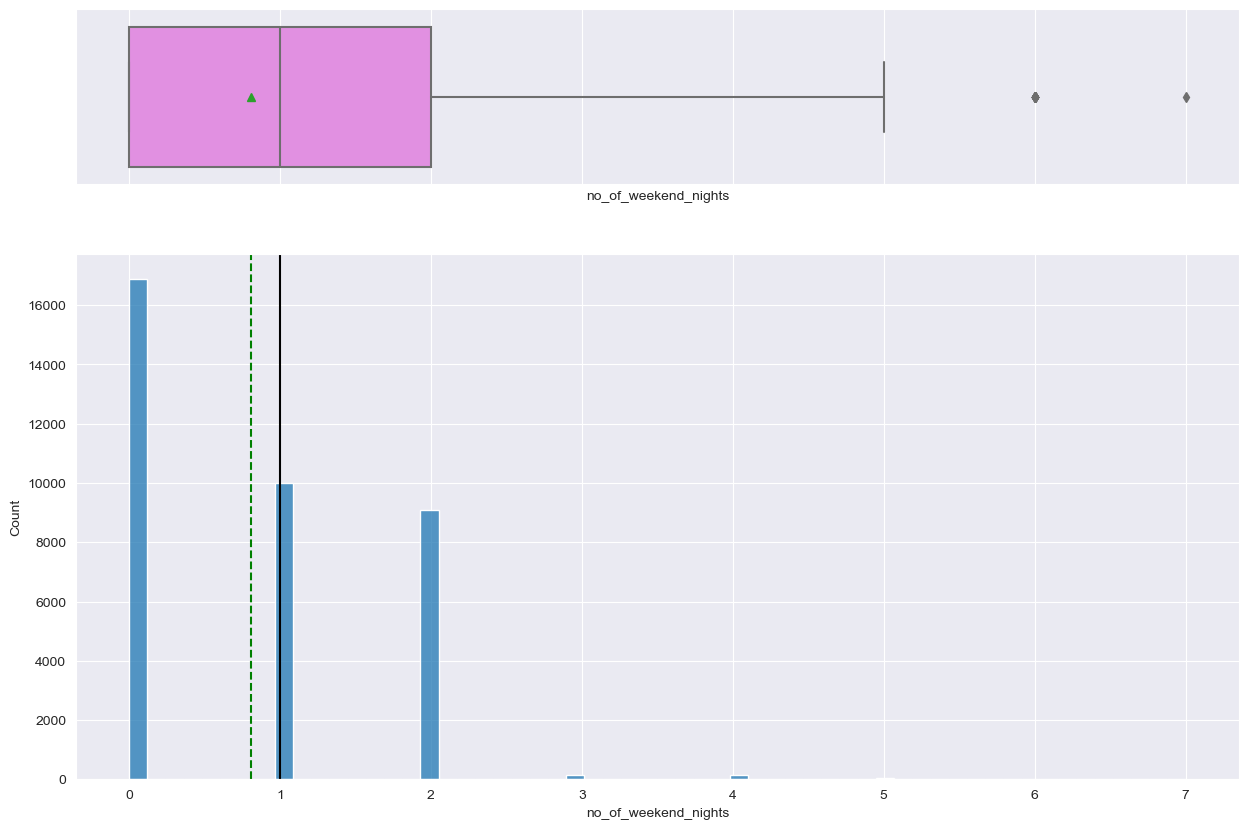

In [17]:
# perform a univariate analysis of the variable and check the value counts
histogram_boxplot(df,"no_of_weekend_nights")
df.no_of_weekend_nights.value_counts()

#### Observations:

The most common number of weekend nights booked in a single hotel booking is 0(16872), followed by 1(9995), 2 (9071), 3(153), 4(129), 5(34), 6(20), and 7(1). 

### no_of_week_nights

2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64

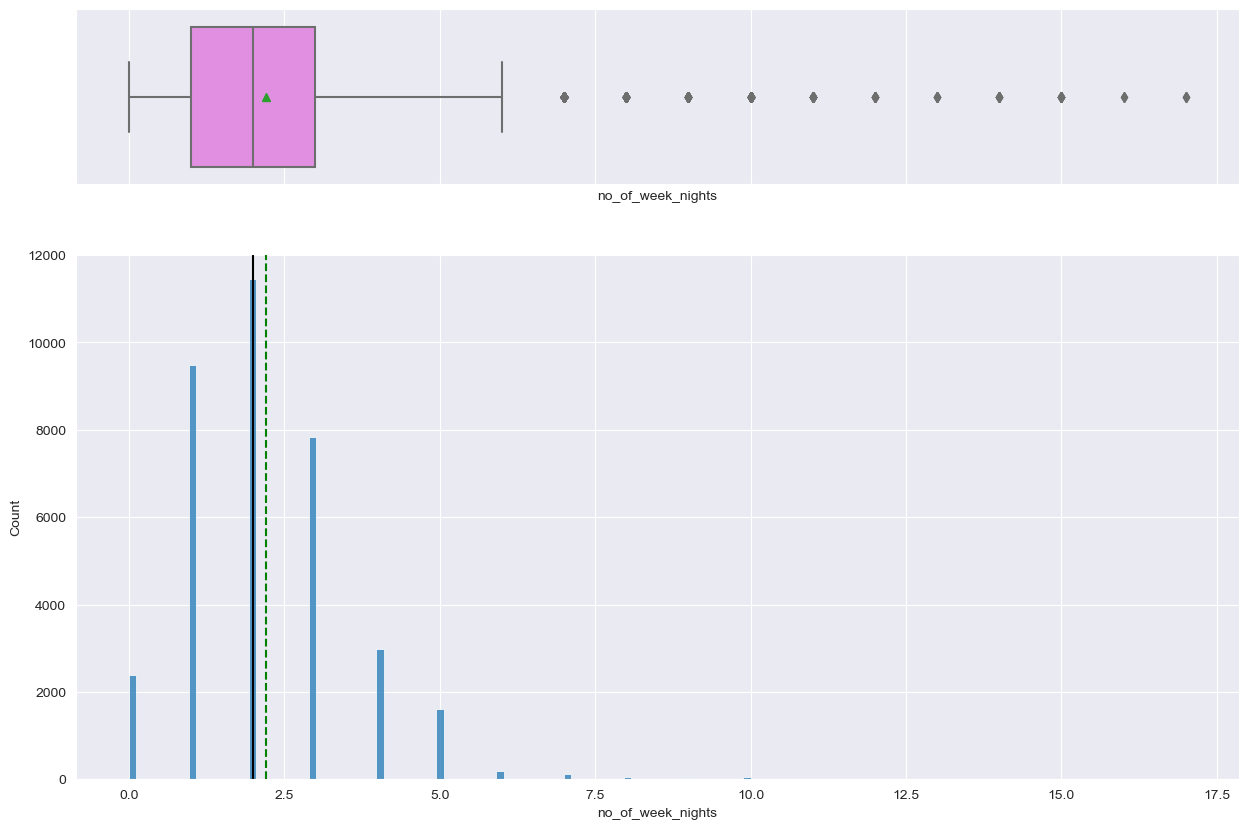

In [18]:
# perform a univariate analysis of the variable and check the value counts
histogram_boxplot(df,"no_of_week_nights")
df.no_of_week_nights.value_counts()

#### Observations:

There is a slightly right skeweedness in the boxplot and a number of datapoints that are considered to be outliers. The majority of patrons tend to book between 0-5 week nights, with the highest frequency being 2 nights(11444). After 5, which has the lowers frequency of the majority mentioned at 1614 counts, the values fall off severely. Between 6 nights and 16 nights, the value count falls from 189 to 2.

### type_of_meal_plan

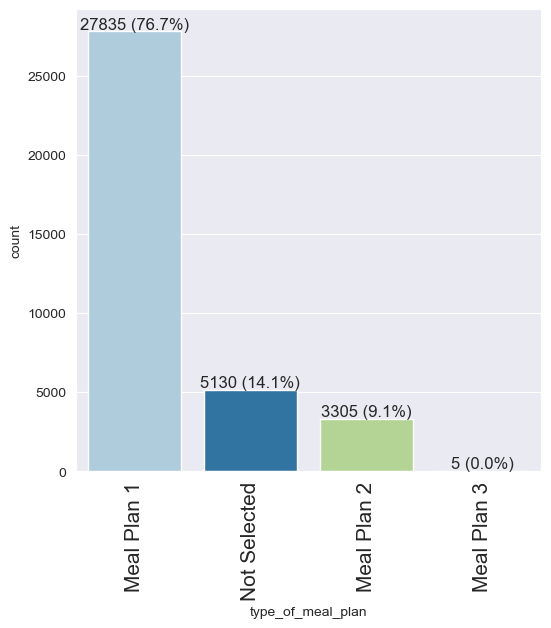

In [19]:
# perform a univariate analysis of the variable
labeled_barplot( df, 'type_of_meal_plan', perc = True)

#### Observations:

Most commonly, guests booked Meal Plan 1 (27835, 76.7%), which is just breakfast. However, guests were more likely to Not select a meal plan (5130, 14.1%) rather than either the Meal Plan 2 (3305, 9.1%) or Meal Plan 3 (5, 0.0%)

### required_car_parking_space

0    35151
1     1124
Name: required_car_parking_space, dtype: int64

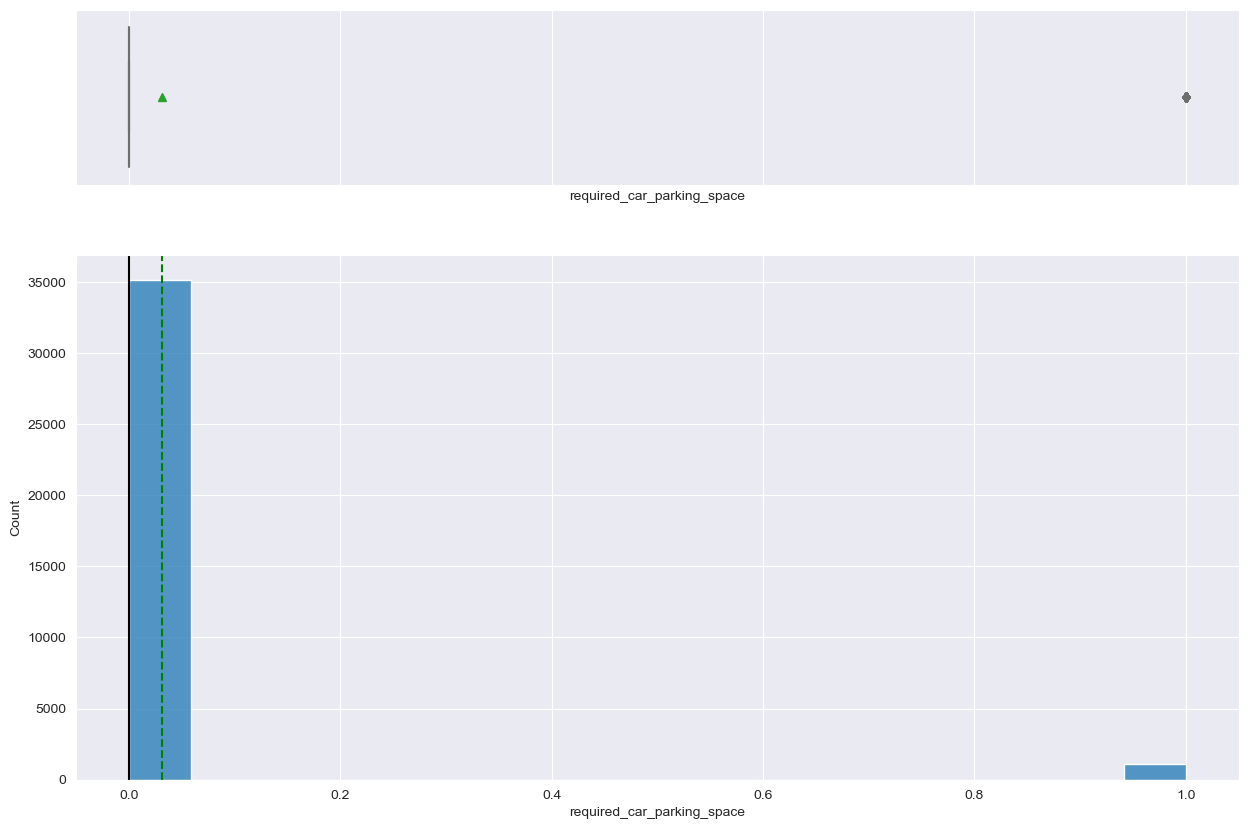

In [20]:
# perform a univariate analysis of the variable and check the value counts
histogram_boxplot(df,"required_car_parking_space")
df.required_car_parking_space.value_counts()

#### Observations:

Guests were far more likely not to require a parking space (35151) than to require one (1124).

### room_type_reserved

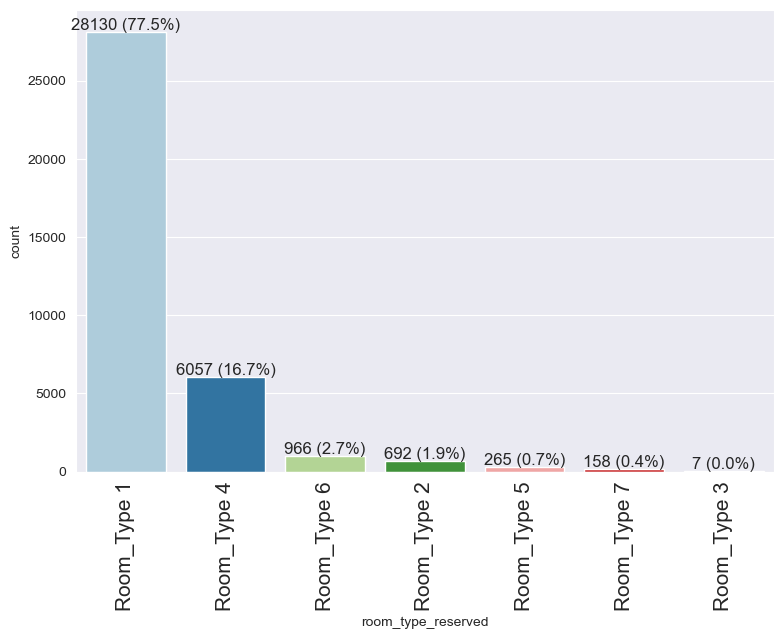

In [21]:
# perform a univariate analysis of the variable
labeled_barplot( df, 'room_type_reserved', perc = True)

#### Observations:

Room_Type 1 was by far the most booked type of room (28130, 77.5%) followed by Room_Type 4 (6057, 16.7%). The other 5 room types were booked a total of ~ 6% of the time. 

### lead_time

count    36275.000000
mean        85.232557
std         85.930817
min          0.000000
25%         17.000000
50%         57.000000
75%        126.000000
max        443.000000
Name: lead_time, dtype: float64

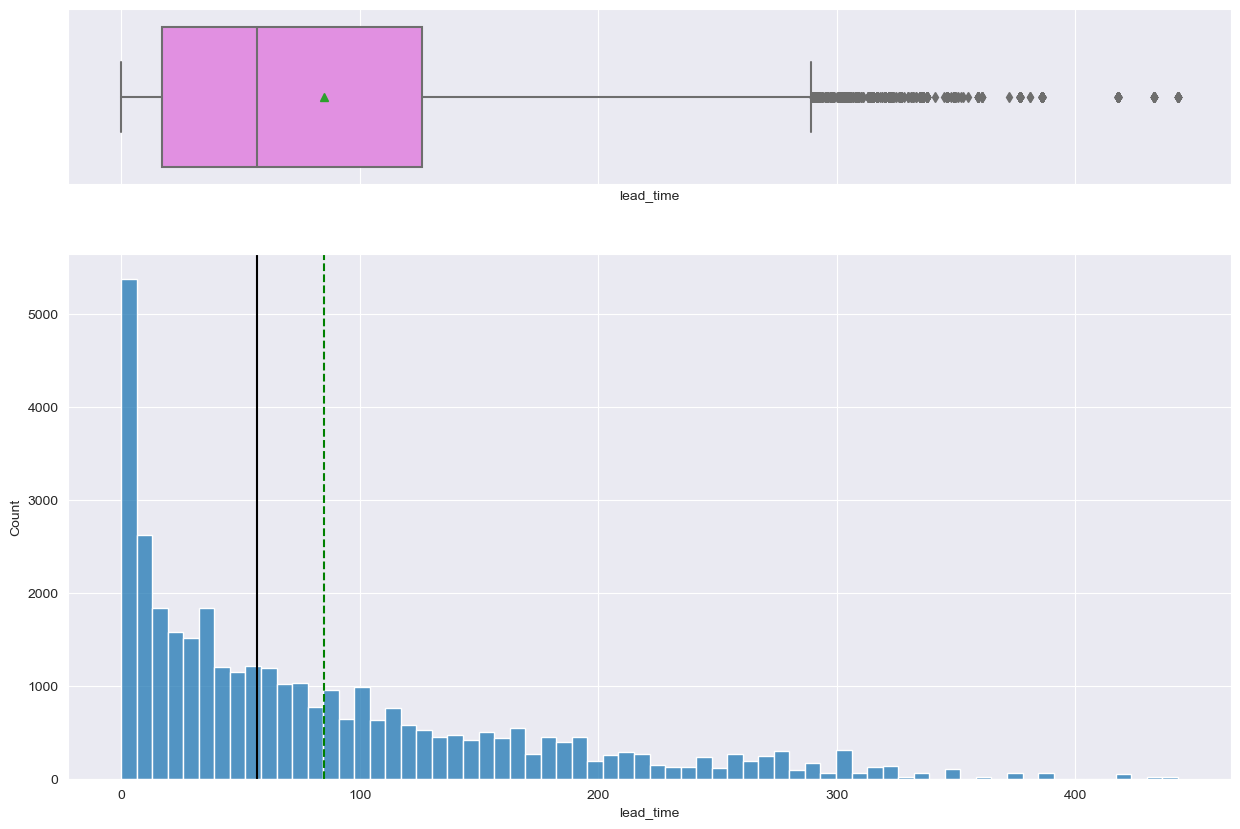

In [22]:
# perform a univariate analysis of the variable and check the value counts
histogram_boxplot(df, 'lead_time')
df.lead_time.describe()

#### Observations:
The mean lead time was 85.23 days, with a min of 0 days and a max of 443 days. The variable is right skewed and has a high number of outliers. The histogram would also suggest that there is a very high frequency of bookings that occur on the same day or within a few days of the arrival date. 

### arrival_year

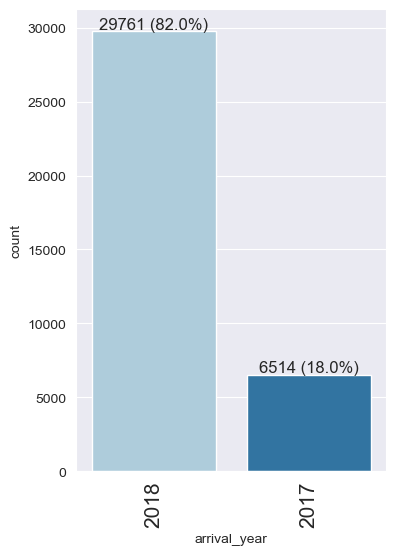

In [23]:
# perform a univariate analysis of the variable and check the value counts
labeled_barplot(df, 'arrival_year', perc = True)

#### Observations:

In the data given, there was a much higher booking rate in 2018 (29761, 82%) than in 2017 (6514, 18%)

### arrival_month

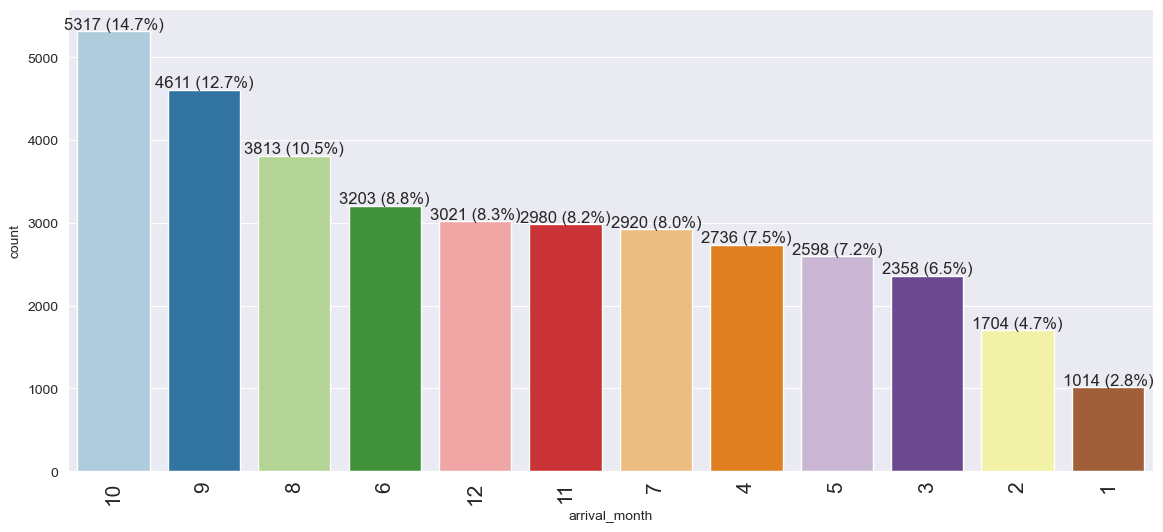

In [24]:
# perform a univariate analysis of the variable and check the value counts
labeled_barplot(df, 'arrival_month', perc = True)

#### Observations:

There seems to be an upward trend of months booked from winter (months 12 - 2) to spring (months 3-5) to summer (months 6-8) to fall (9-11), if the numbers correlate directly with the calendar year, with the decline starting back between months 10 and 11. 

### arrival_date

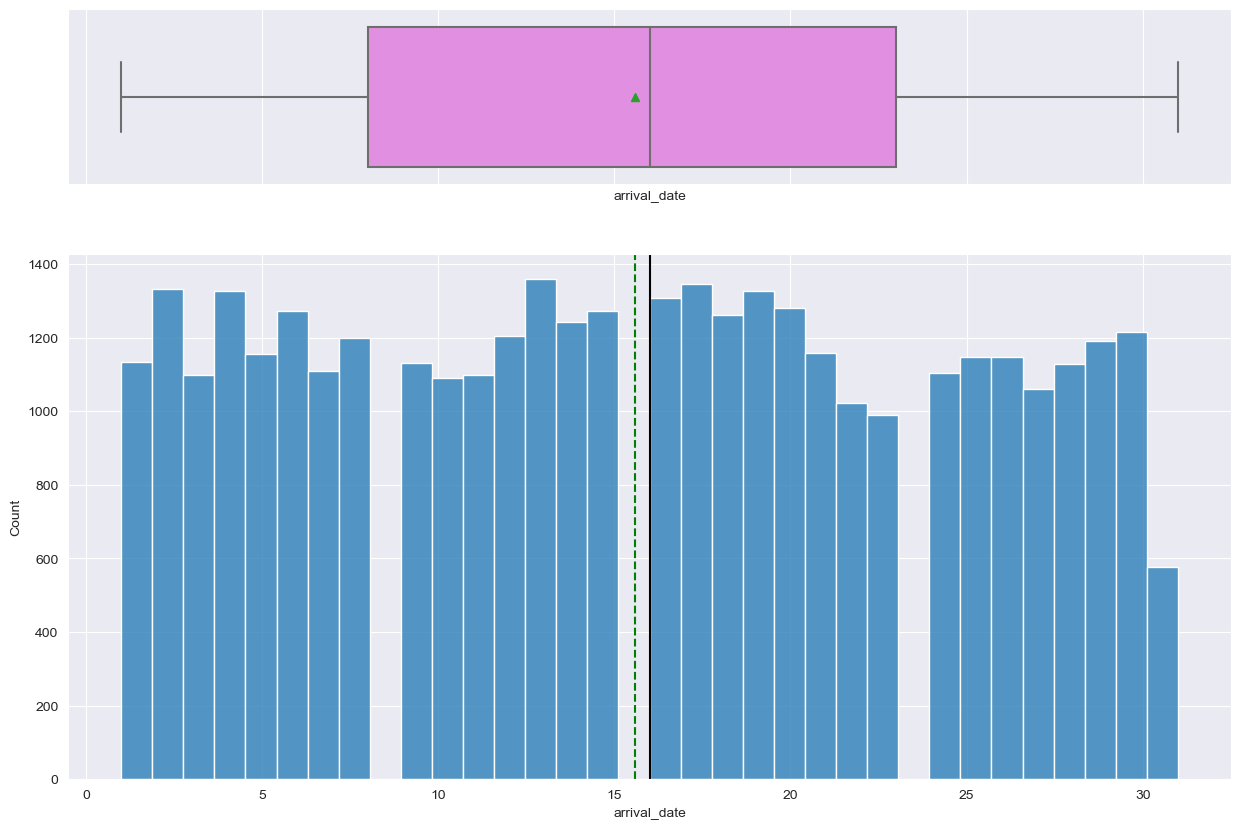

In [25]:
# perform a univariate analysis of the variable
histogram_boxplot(df, 'arrival_date')

#### Observations:

This appears to be a pretty normal distribution. There is an obvious frop off at the 31st day as only half of the months have 31 days. 

### market_segment_type

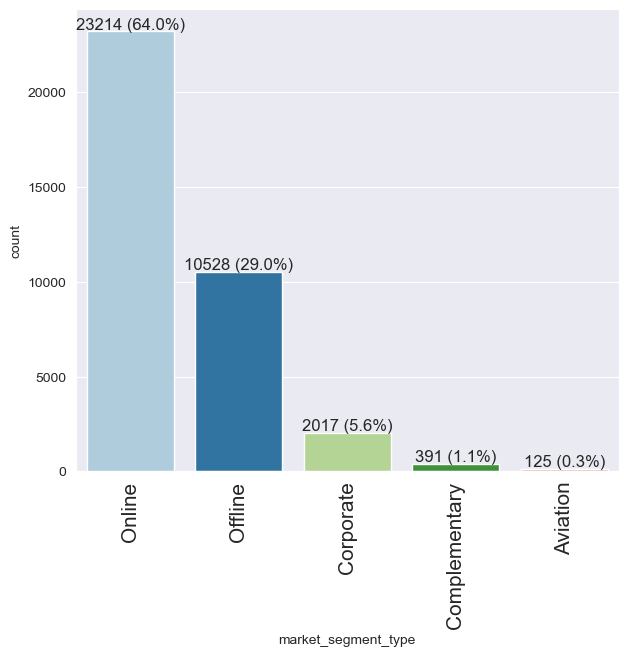

In [26]:
# perform a univariate analysis of the variable
labeled_barplot(df, 'market_segment_type', perc = True)

#### Observations:

The largest market segment type was only at 23214(64%), followed by offline at 10528(29%), corporate at 2017(5.6&), Complementary at 391(1.1%), and Aviation at 125(0.3%). 

### repeated_guest

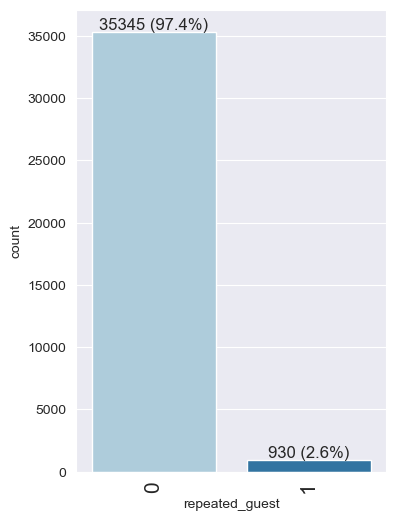

In [27]:
# perform a univariate analysis of the variable
labeled_barplot(df, 'repeated_guest', perc = True)

#### Observations:

Most guests were first time guests (35345, 97.4%) as opposed to repeat guests (930, 2.6%)

### no_of_previous_cancellations

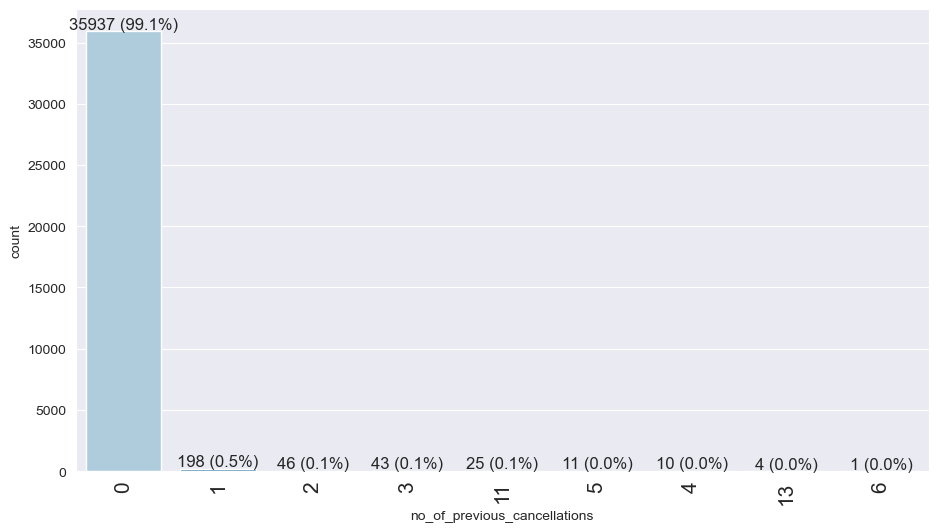

In [28]:
# perform a univariate analysis of the variable
labeled_barplot(df, 'no_of_previous_cancellations', perc = True)

In [29]:
# check value counts of the filtered variable
filtered_df = df[df['repeated_guest']==0]
filtered_df['repeated_guest'].value_counts()

0    35345
Name: repeated_guest, dtype: int64

In [30]:
# check value counts of the filtered variable
filtered_df['no_of_previous_cancellations'].value_counts()

0    35345
Name: no_of_previous_cancellations, dtype: int64

#### Observations:

Most guests had 0 cancellations (35937, 99.1%) while some (338, 0.9%) of guests had between 1 and 13 cancellations. 
However, 0 previous cancellations may be so large because it includes single visit guests, which all have 0 previous cancellations. All previous cancellations that are included are repeated guests.

### no_of_previous_bookings_not_canceled

count    36275.000000
mean         0.153411
std          1.754171
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         58.000000
Name: no_of_previous_bookings_not_canceled, dtype: float64
number of unique values =  59


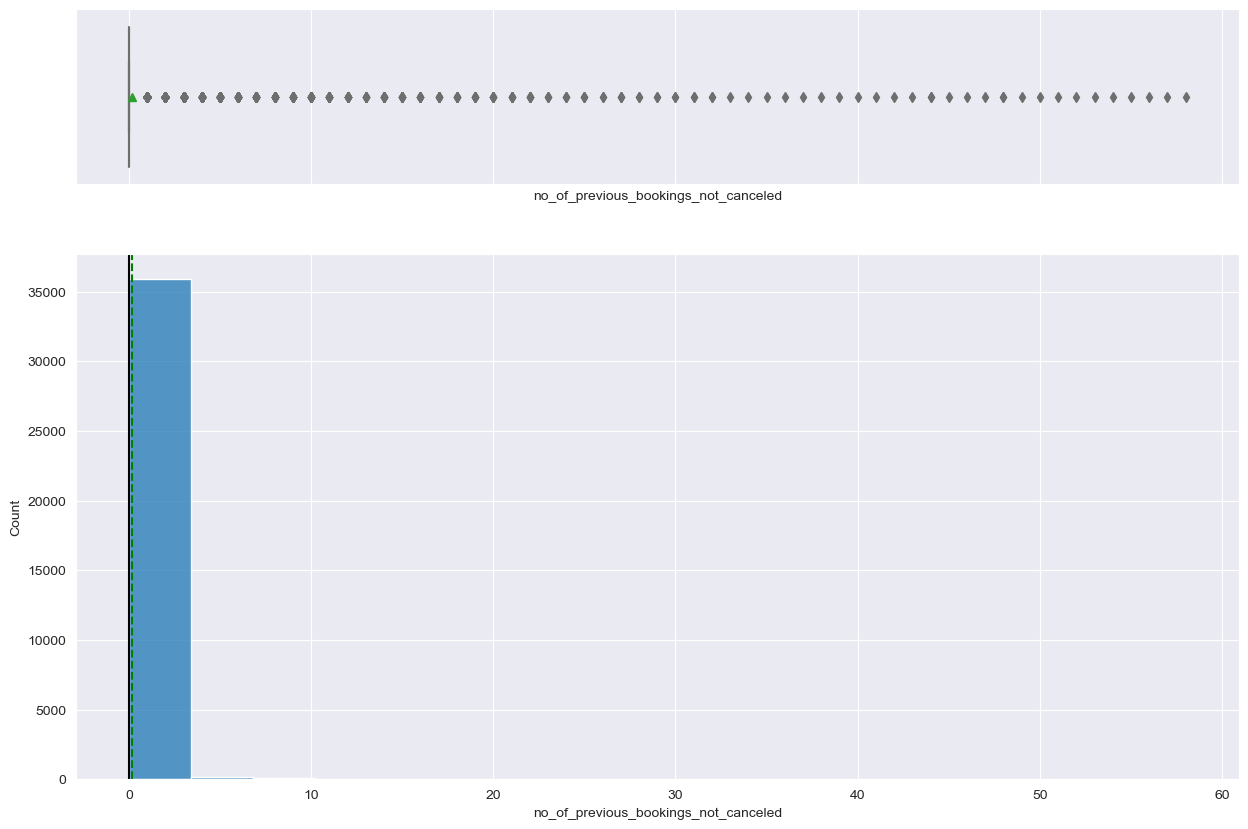

In [31]:
# perform a univariate analysis of the variable and print the descriptive statistics
histogram_boxplot(df, 'no_of_previous_bookings_not_canceled')
print(df.no_of_previous_bookings_not_canceled.describe())
print(f'number of unique values = ', df.no_of_previous_bookings_not_canceled.nunique())

In [32]:
# check value counts of the filtered variable
filtered_df = df[df['repeated_guest']==0]
filtered_df['repeated_guest'].value_counts()

0    35345
Name: repeated_guest, dtype: int64

In [33]:
# check value counts of the filtered variable
filtered_df['no_of_previous_bookings_not_canceled'].value_counts()

0    35345
Name: no_of_previous_bookings_not_canceled, dtype: int64

#### Observations:
Most guests did not cancel a booking before the current booking. However, there were some guests who cancelled upwards of 58 times prior to the current booking. 
However, 0 previous non cancellations may be so large because it includes single visit guests, which all have 0 previous cancellations. All previous non cancellations that are included are repeated guests.

### avg_price_per_room

count    36275.000000
mean       103.423539
std         35.089424
min          0.000000
25%         80.300000
50%         99.450000
75%        120.000000
max        540.000000
Name: avg_price_per_room, dtype: float64

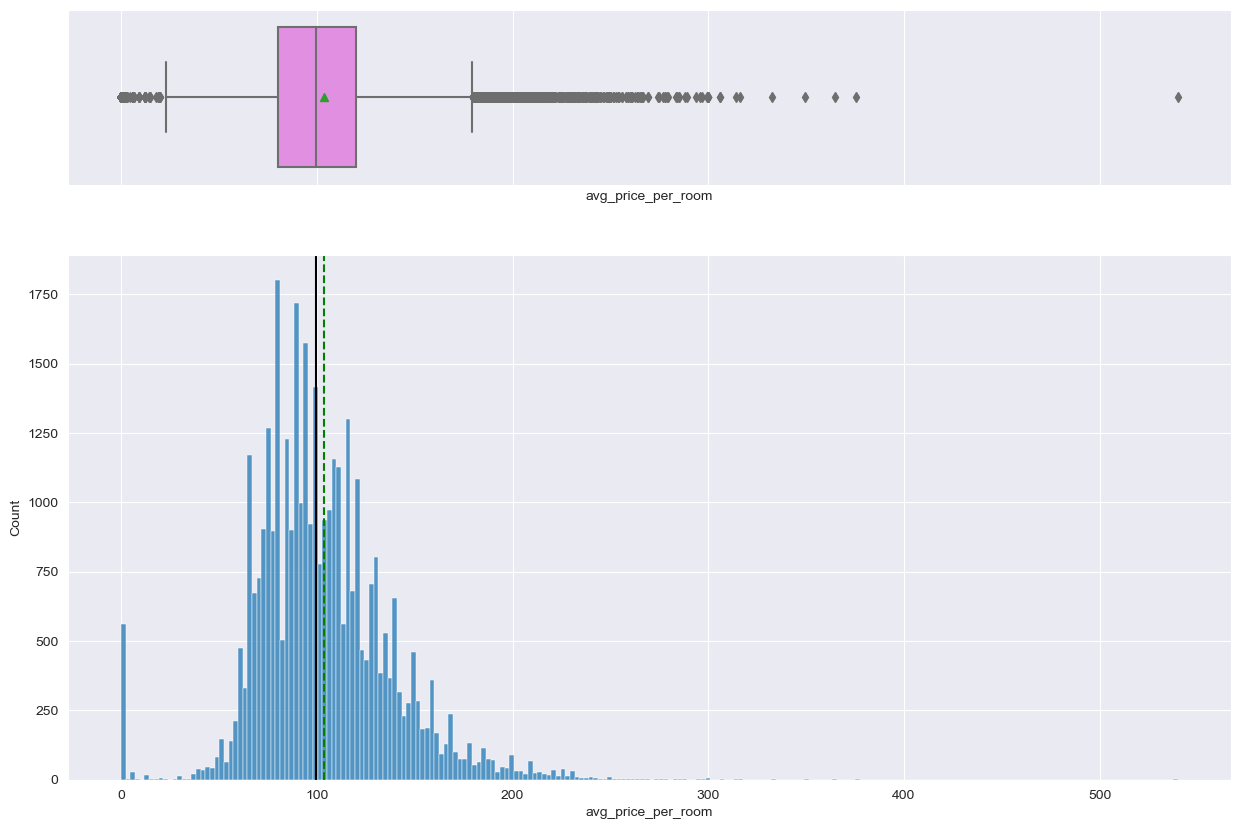

In [34]:
# perform a univariate analysis of the variable and check the descriptive statistics
histogram_boxplot(df, 'avg_price_per_room')
df.avg_price_per_room.describe()

#### Observations:

The mean average price per room was 103.42 Euros, with some rooms being complimentary (0 Euros) and others costing upwards of 540 Euros. 

### no_of_special_requests

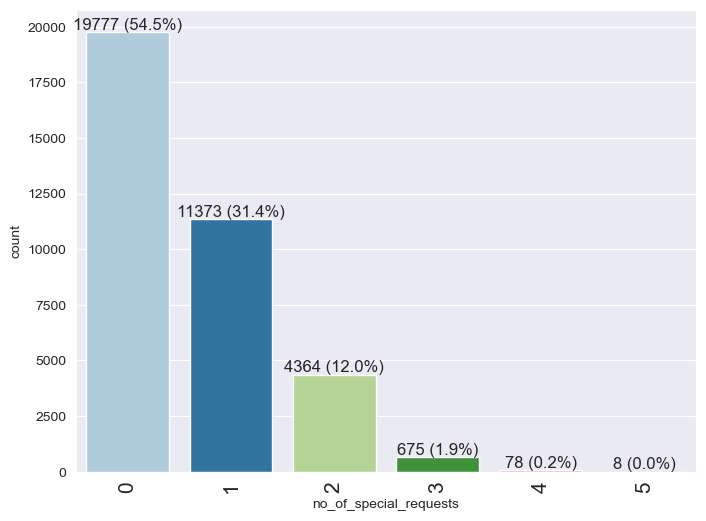

In [35]:
# perform a univariate analysis of the variable
labeled_barplot(df, 'no_of_special_requests', perc = True)

#### Observations:

Around half of the guests had no special requests when booking the room (19777, 54.5%). After 0 requests, the value count dropped per increasing number of requests beginning with 1 (11373, 31.4%) and maxing out at 5 special requests (8, 0.0%). 

### booking_status

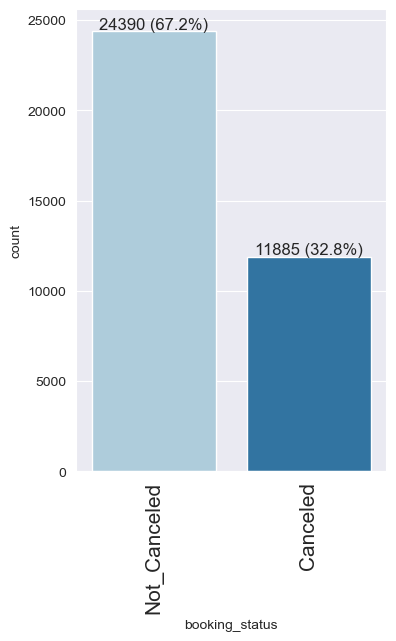

In [36]:
# perform a univariate analysis of the variable
labeled_barplot(df, 'booking_status', perc = True)

#### Observations:

the data shows that 24390(67.2%) of total bookings were not cancelled while 11885(32.8%) of the total bookings were canceled. 

### Bivariate Analysis

#### Correlation Check

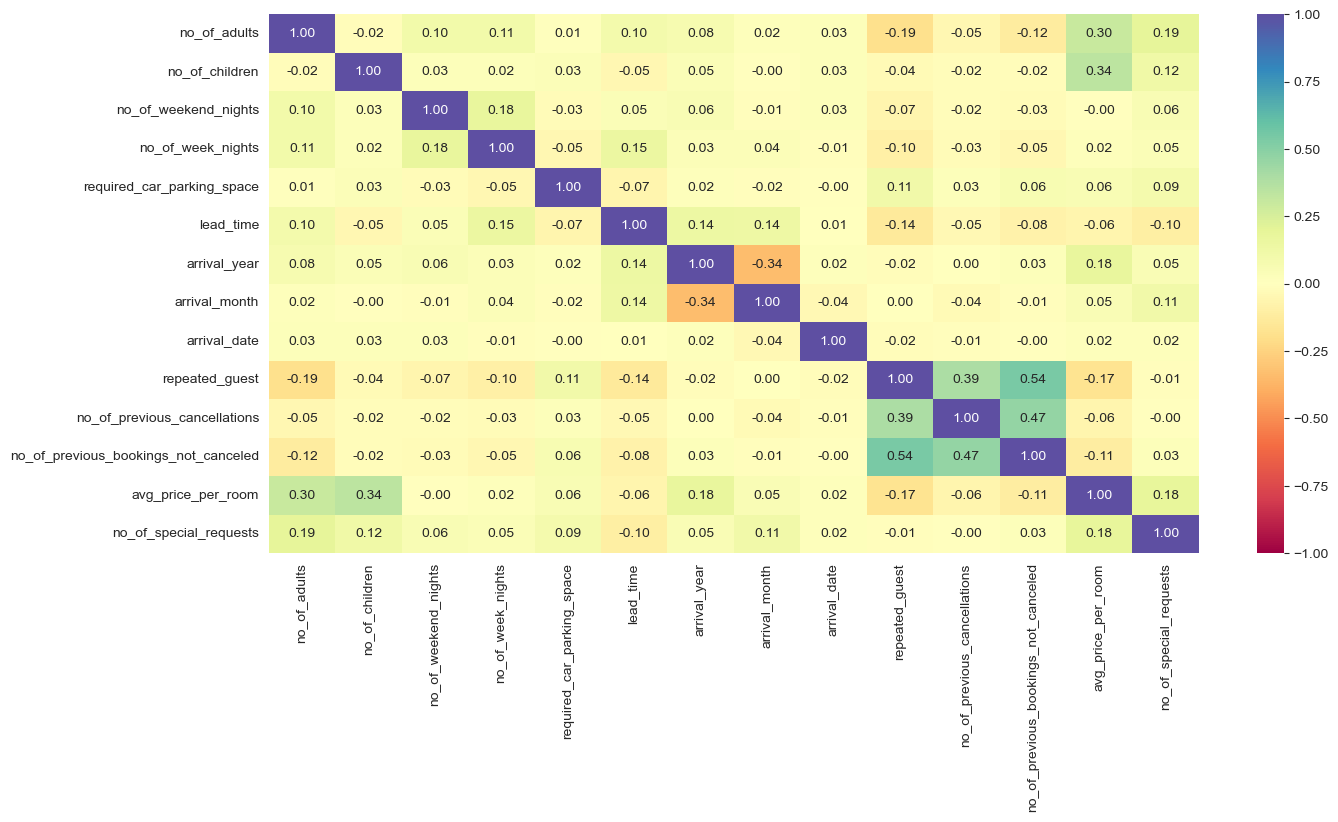

In [37]:
# run a heatmap to check correlation
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observations:

* no_of_previous_bookings_not_canceled has a 0.54 correlation with repeated guest
* no_of_previous_cancellations has a 0.47 correlation with no_of_previous_bookings_not_canceled
* repeated_guest as a 0.39 correlation with no_of_previous_cancellations
* no_of_children has a 0.34 correlation with avg_price_per_room

### booking_status vs no_of_adults  

booking_status  Canceled  Not_Canceled    All
no_of_adults                                 
All                11885         24390  36275
2                   9119         16989  26108
1                   1856          5839   7695
3                    863          1454   2317
0                     44            95    139
4                      3            13     16
------------------------------------------------------------------------------------------------------------------------


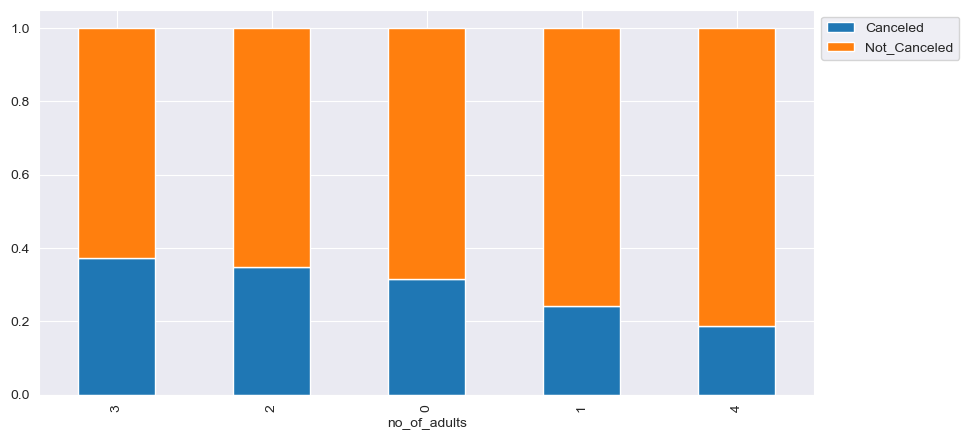

In [38]:
# perform a bivariate analysis of the variable against booking status
stacked_barplot(df, 'no_of_adults', 'booking_status')

#### Observations:

There does not seem to be a significant correlation between number of adults and booking status.

### booking_status vs no_of_children  

booking_status  Canceled  Not_Canceled    All
no_of_children                               
All                11885         24390  36275
0                  10882         22695  33577
1                    540          1078   1618
2                    457           601   1058
3                      5            14     19
9                      1             1      2
10                     0             1      1
------------------------------------------------------------------------------------------------------------------------


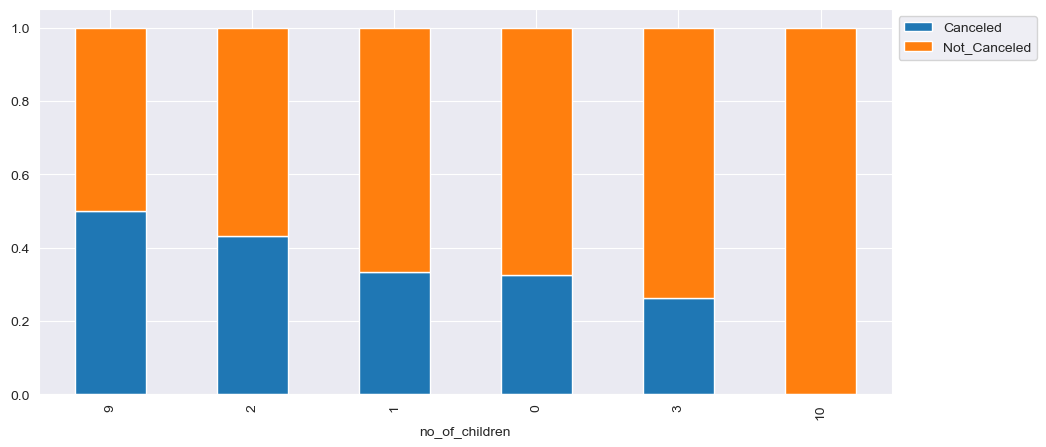

In [39]:
# perform a bivariate analysis of the variable against booking status
stacked_barplot(df, 'no_of_children', 'booking_status')

#### Observations:

Similar to number of adults, number of children does not seem to have a significant impact on booking status.

### booking_status vs no_of_weekend_nights 

booking_status        Canceled  Not_Canceled    All
no_of_weekend_nights                               
All                      11885         24390  36275
0                         5093         11779  16872
1                         3432          6563   9995
2                         3157          5914   9071
4                           83            46    129
3                           74            79    153
5                           29             5     34
6                           16             4     20
7                            1             0      1
------------------------------------------------------------------------------------------------------------------------


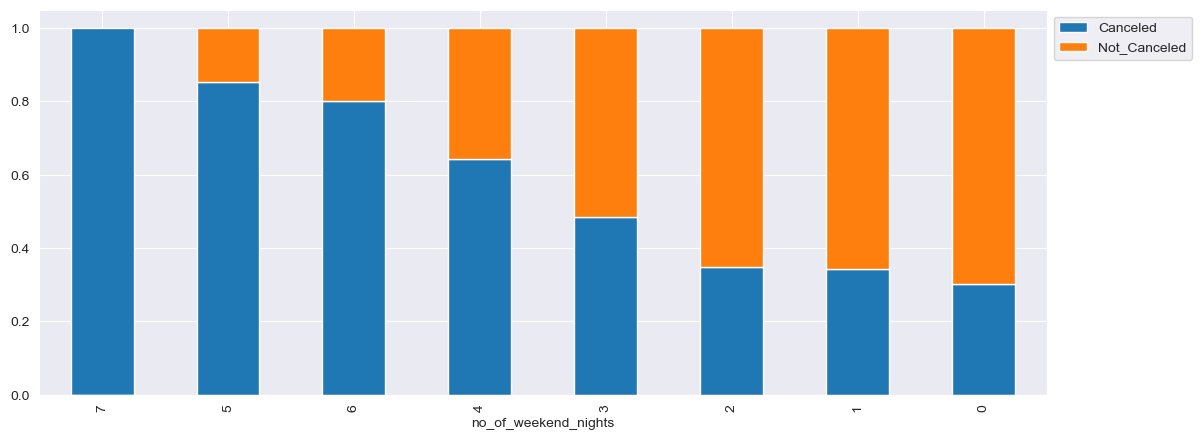

In [40]:
# perform a bivariate analysis of the variable against booking status
stacked_barplot(df, 'no_of_weekend_nights', 'booking_status')

#### Observations:

Interestingly, there seems to be an increasing rate of cancellations as the number of weekend nights of the booking increases

### booking_status vs no_of_week_nights 

booking_status     Canceled  Not_Canceled    All
no_of_week_nights                               
All                   11885         24390  36275
2                      3997          7447  11444
3                      2574          5265   7839
1                      2572          6916   9488
4                      1143          1847   2990
0                       679          1708   2387
5                       632           982   1614
6                        88           101    189
10                       53             9     62
7                        52            61    113
8                        32            30     62
9                        21            13     34
11                       14             3     17
15                        8             2     10
12                        7             2      9
13                        5             0      5
14                        4             3      7
16                        2             0      2
17                  

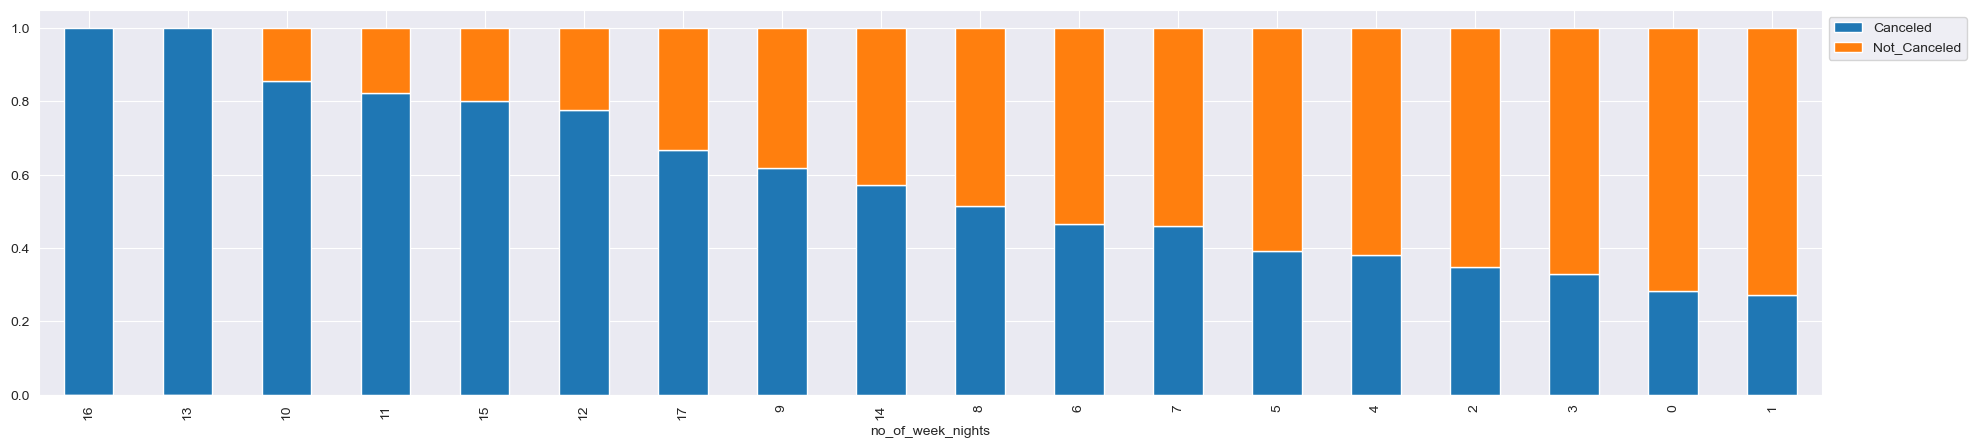

In [41]:
# perform a bivariate analysis of the variable against booking status
stacked_barplot(df, 'no_of_week_nights', 'booking_status')

#### Observations:

Similar to weekend nights, the rate of cancellation seems to increase as the number of week nights increases

### booking_status vs type_of_meal_plan 

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   11885         24390  36275
Meal Plan 1            8679         19156  27835
Not Selected           1699          3431   5130
Meal Plan 2            1506          1799   3305
Meal Plan 3               1             4      5
------------------------------------------------------------------------------------------------------------------------


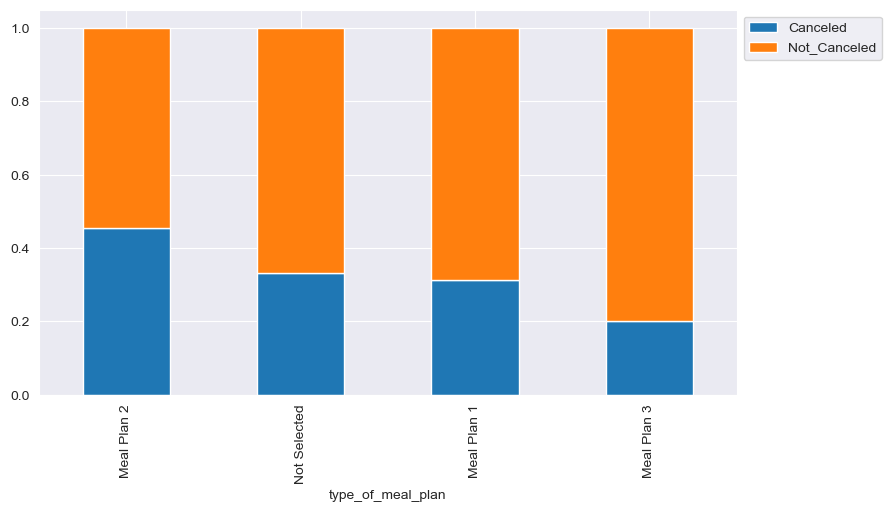

In [42]:
# perform a bivariate analysis of the variable against booking status
stacked_barplot(df, 'type_of_meal_plan', 'booking_status')

#### Observations:

According to the stacked barplot, of the guests who ordered Meal Plan 2, a higher percentage cancelled than the other options, with the smallest cancelling percentage being of guests who ordered Meal Plan 3. However, the number of people who ordered Meal Plan 3 was much smaller than any of the other options so the magnatidue of the percentage is a but weaker than that of the other options.

### booking_status vs required_car_parking_space  

booking_status              Canceled  Not_Canceled    All
required_car_parking_space                               
All                            11885         24390  36275
0                              11771         23380  35151
1                                114          1010   1124
------------------------------------------------------------------------------------------------------------------------


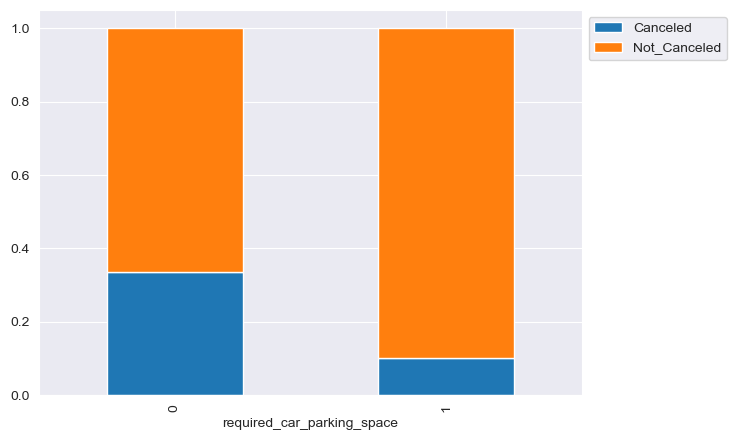

In [43]:
# perform a bivariate analysis of the variable against booking status
stacked_barplot(df, 'required_car_parking_space', 'booking_status')

#### Observations:

There were far more quests who opted the 0 option vs the 1 option. The percentage of cancellation seems to be higher for the guests who opted the 0 option, but there are far more of them than those who opted with the 1 option. 

### booking_status vs room_type_reserved   

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    11885         24390  36275
Room_Type 1             9072         19058  28130
Room_Type 4             2069          3988   6057
Room_Type 6              406           560    966
Room_Type 2              228           464    692
Room_Type 5               72           193    265
Room_Type 7               36           122    158
Room_Type 3                2             5      7
------------------------------------------------------------------------------------------------------------------------


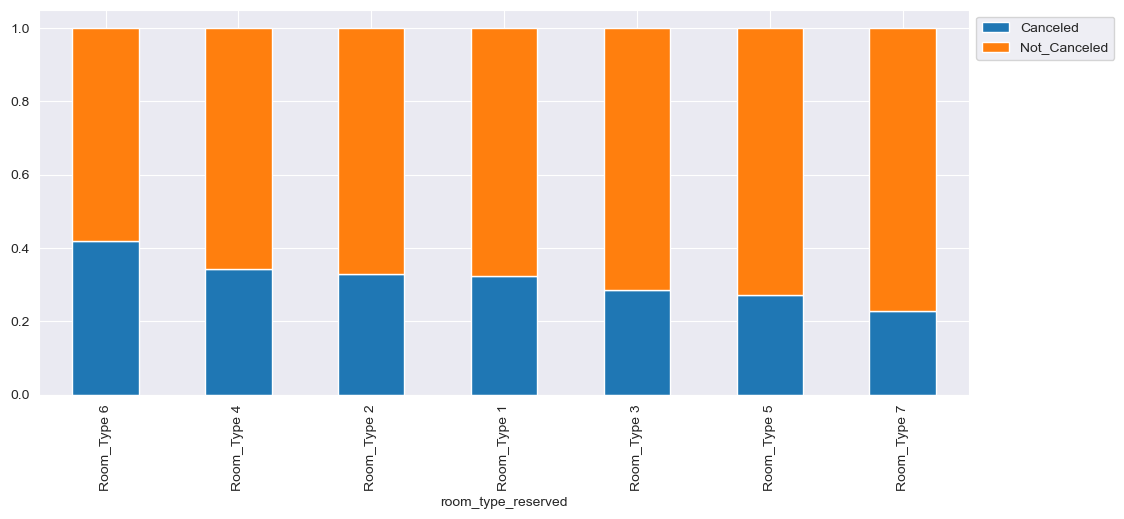

In [44]:
# perform a bivariate analysis of the variable against booking status
stacked_barplot(df, 'room_type_reserved', 'booking_status')

#### Observations:

It does not really seem to matter which room type was chosen by the guest. Room type 7 has a slightly lower cancellation rate while room type 6 has a slightly higher right of cancellation, but they all fall within ~0.22 and ~0.42.

### booking_status vs lead_time   

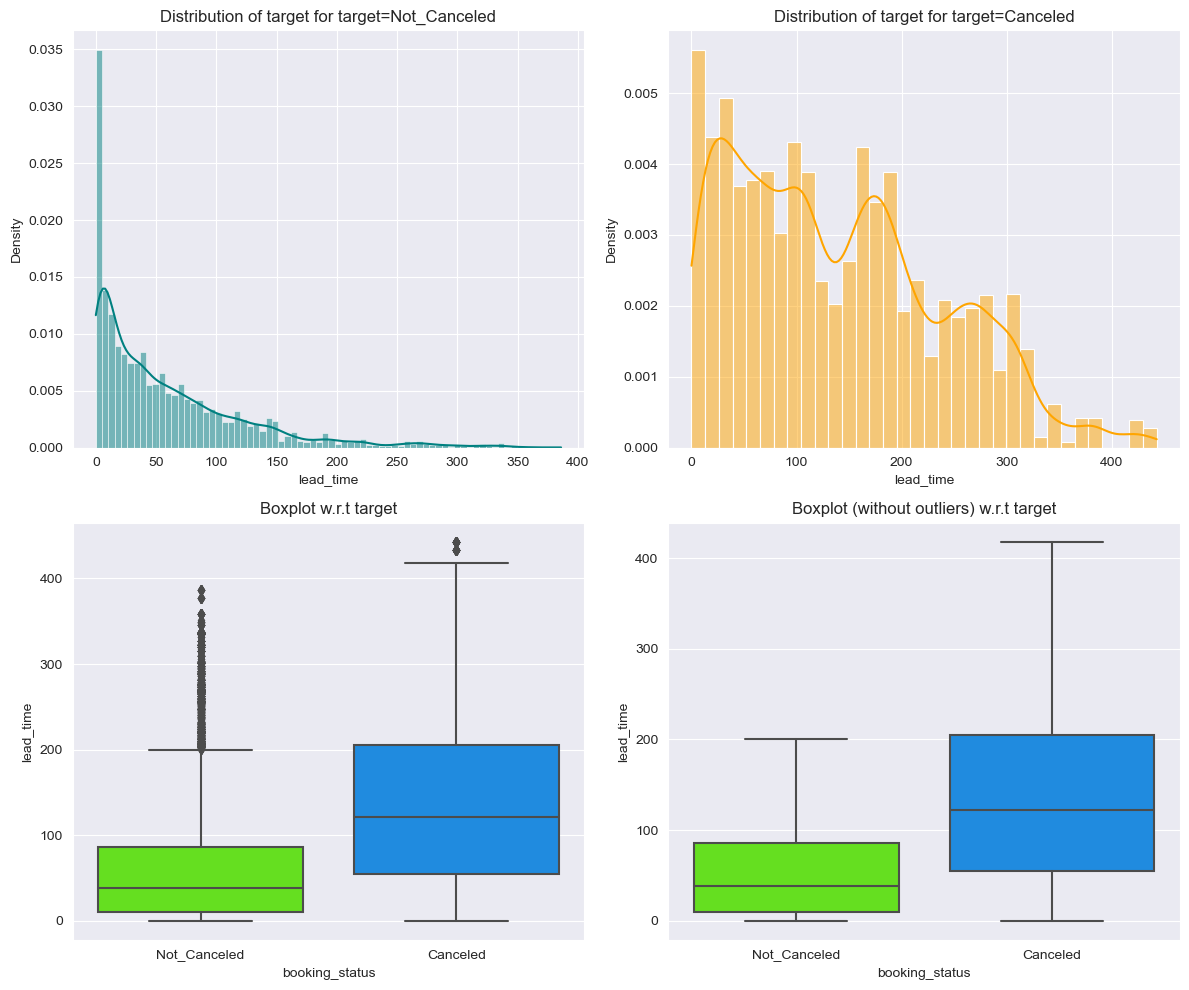

In [45]:
# perform a bivariate analysis of the variable against booking status
distribution_plot_wrt_target(df, 'lead_time', 'booking_status')

#### Observations:

Both histograms skewed to the right. However, the distribution of the Not Canceled group drops significantly after 0th day and then moves quickly towards 0.000 on the y axis by the 200th day. The Canceled group, while also right skewed, drops very slowly between the 0th day of lead time and the 300th, before dropping quickly. This, along with the boxplots, shows that the Canceled group has a much more even distribution, while remaining right skewed. The Not Canceled group has a very tight distribution, leaving it with many more outliers than the Canceled group.

### booking_status vs arrival_year 

booking_status  Canceled  Not_Canceled    All
arrival_year                                 
All                11885         24390  36275
2018               10924         18837  29761
2017                 961          5553   6514
------------------------------------------------------------------------------------------------------------------------


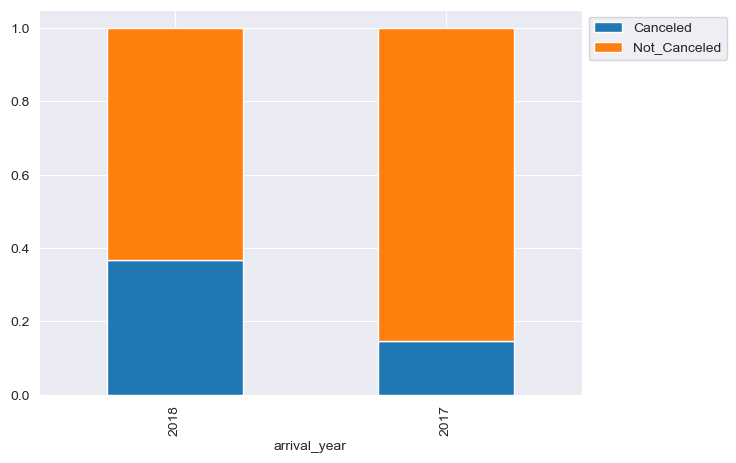

In [46]:
# perform a bivariate analysis of the variable against booking status
stacked_barplot(df, 'arrival_year', 'booking_status')

#### Observations:

While 2018 had many more bookings, it also had a higher percentage of cancellations when compared to the bookings in 2017.

### booking_status vs arrival_month   

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                11885         24390  36275
10                  1880          3437   5317
9                   1538          3073   4611
8                   1488          2325   3813
7                   1314          1606   2920
6                   1291          1912   3203
4                    995          1741   2736
5                    948          1650   2598
11                   875          2105   2980
3                    700          1658   2358
2                    430          1274   1704
12                   402          2619   3021
1                     24           990   1014
------------------------------------------------------------------------------------------------------------------------


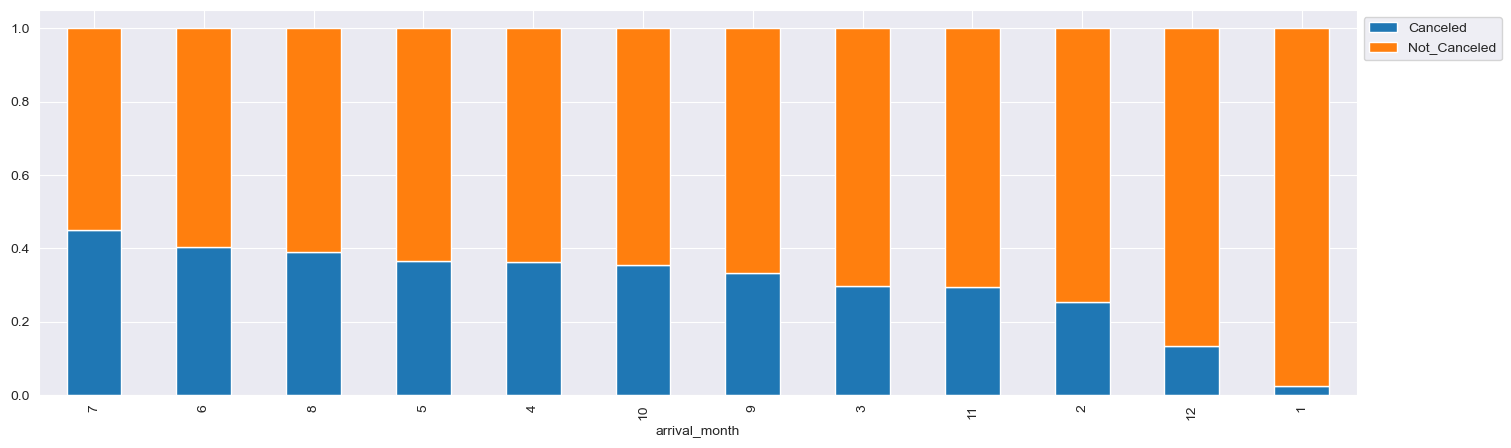

In [47]:
# perform a bivariate analysis of the variable against booking status
stacked_barplot(df, 'arrival_month', 'booking_status')

#### Observations:

There seems to be a slight increase in cancellations as time moves towards the middle of the year and then slowly decreases towards the end of the year

### booking_status vs arrival_date  

booking_status  Canceled  Not_Canceled    All
arrival_date                                 
All                11885         24390  36275
15                   538           735   1273
4                    474           853   1327
16                   473           833   1306
30                   465           751   1216
1                    465           668   1133
12                   460           744   1204
17                   448           897   1345
6                    444           829   1273
26                   425           721   1146
19                   413           914   1327
20                   413           868   1281
13                   408           950   1358
28                   405           724   1129
3                    403           695   1098
25                   395           751   1146
21                   376           782   1158
24                   372           731   1103
18                   366           894   1260
7                    364          

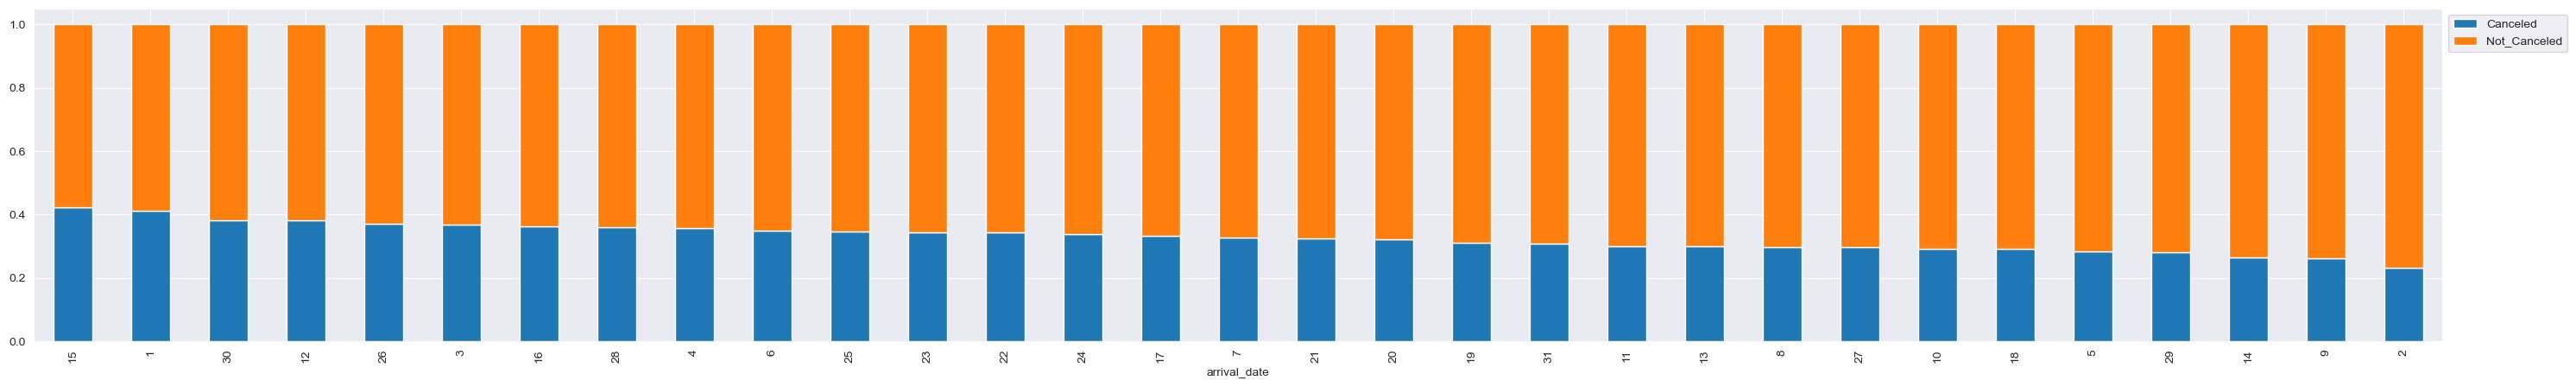

In [48]:
# perform a bivariate analysis of the variable against booking status
stacked_barplot(df, 'arrival_date', 'booking_status')

#### Observations:

The day of the month does not seem to matter for booking status, there is a range of about 10% between the lowest rate of cancellations and highest rate of cancellations per day within a month and there is no real pattern.

### booking_status vs market_segment_type  

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


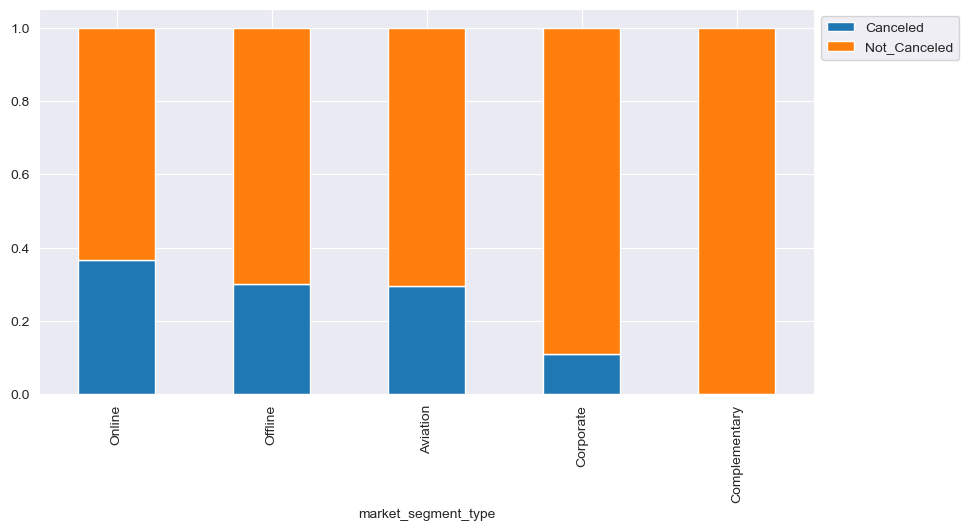

In [49]:
# perform a bivariate analysis of the variable against booking status
stacked_barplot(df, 'market_segment_type', 'booking_status')

#### Observations:

unsurprisingly, there were 0 cancelled complimentary bookings and far fewer cancelled corporate bookings than the other categories. It is unsurprising that Online, Offline, and Aviation both have the most cancellations and all have similar rates of cancellation.

### booking_status vs repeated_guest 

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


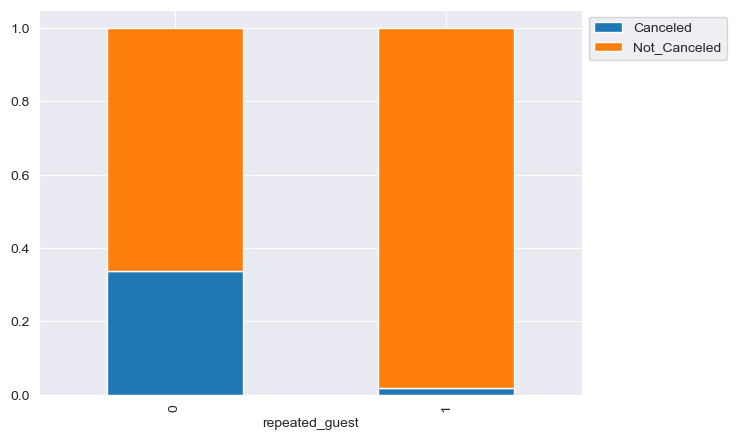

In [50]:
# perform a bivariate analysis of the variable against booking status
stacked_barplot(df, 'repeated_guest', 'booking_status')

#### Observations:

Repeat guests are far less likely to cancel according to the stack barplot, although there are far fewer occurances of repeat guests than first time guests. 

### booking_status vs no_of_previous_cancellations 

booking_status                Canceled  Not_Canceled    All
no_of_previous_cancellations                               
All                              11885         24390  36275
0                                11869         24068  35937
1                                   11           187    198
13                                   4             0      4
3                                    1            42     43
2                                    0            46     46
4                                    0            10     10
5                                    0            11     11
6                                    0             1      1
11                                   0            25     25
------------------------------------------------------------------------------------------------------------------------


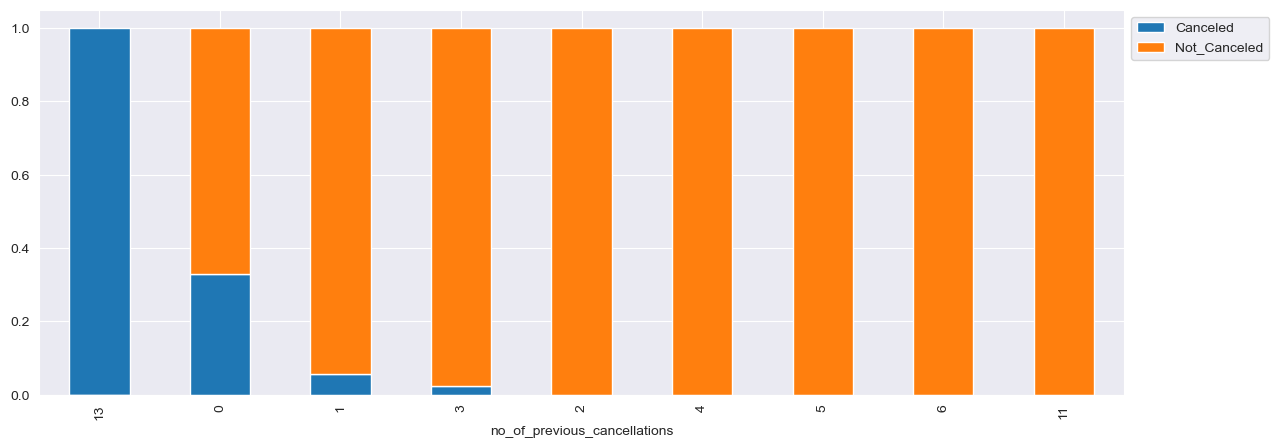

In [51]:
# perform a bivariate analysis of the variable against booking status
stacked_barplot(df, 'no_of_previous_cancellations', 'booking_status')

#### Observations:

It is unsuprising that all 4 guests who have cancelled 13 times in the past also cancelled their current bookings. However, on the other hand, all 25 guests who have in the past cancelled 11 different bookings have not cancelled the current booking. The largest frequency, 0 previous cancellations has 11869 cancellations of the guest's current bookings and 24068 have Not Cancelled their current bookings. 

### booking_status vs no_of_previous_bookings_not_canceled 

In [52]:
# create a copy of df
df1 = df.copy()

In [53]:
# change the values of no_of_previous_bookings_not_cancelled to allow for easier analysis
for index, item in df1['no_of_previous_bookings_not_canceled'].items():
    
    if item == 0:
        continue 

    elif 1 <= item < 10:
        df1.loc[index, 'no_of_previous_bookings_not_canceled'] = "1-10"

    elif 11 <= item < 20:
        df1.loc[index, 'no_of_previous_bookings_not_canceled'] = "11-20"

    elif 21 <= item < 30:
        df1.loc[index, 'no_of_previous_bookings_not_canceled'] = "21-30"

    elif 31 <= item < 40:
        df1.loc[index, 'no_of_previous_bookings_not_canceled'] = "31-40"

    else:
        df1.loc[index, 'no_of_previous_bookings_not_canceled'] = "41+"

df1.no_of_previous_bookings_not_canceled.value_counts()

0        35463
1-10       647
11-20       76
41+         48
21-30       30
31-40       11
Name: no_of_previous_bookings_not_canceled, dtype: int64

booking_status                        Canceled  Not_Canceled    All
no_of_previous_bookings_not_canceled                               
All                                      11885         24390  36275
0                                        11878         23585  35463
1-10                                         6           641    647
11-20                                        1            75     76
21-30                                        0            30     30
31-40                                        0            11     11
41+                                          0            48     48
------------------------------------------------------------------------------------------------------------------------


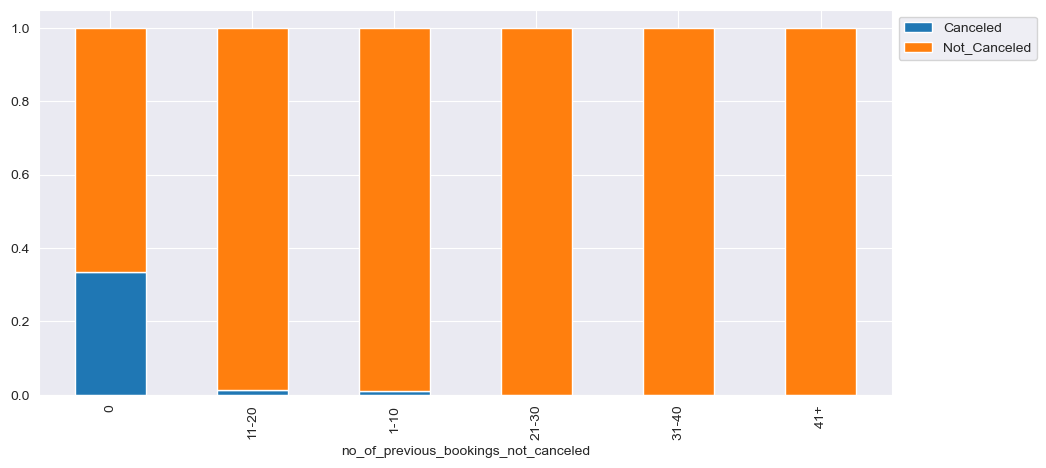

In [54]:
# perform a bivariate analysis of the variable against booking status
stacked_barplot(df1, 'no_of_previous_bookings_not_canceled', 'booking_status')

#### Observations:

The rate of cancellation is much higher among those guests who have had 0 cancelled prior bookings, but this takes into account the number of guests who have had 0 prior bookings. Similar to the no_of_previous_cancellations variable above, this stacked barplot shows that many cancellations occur with single visit guests who have not booked with this hotel prior to the current booking.

### booking_status vs avg_price_per_room   

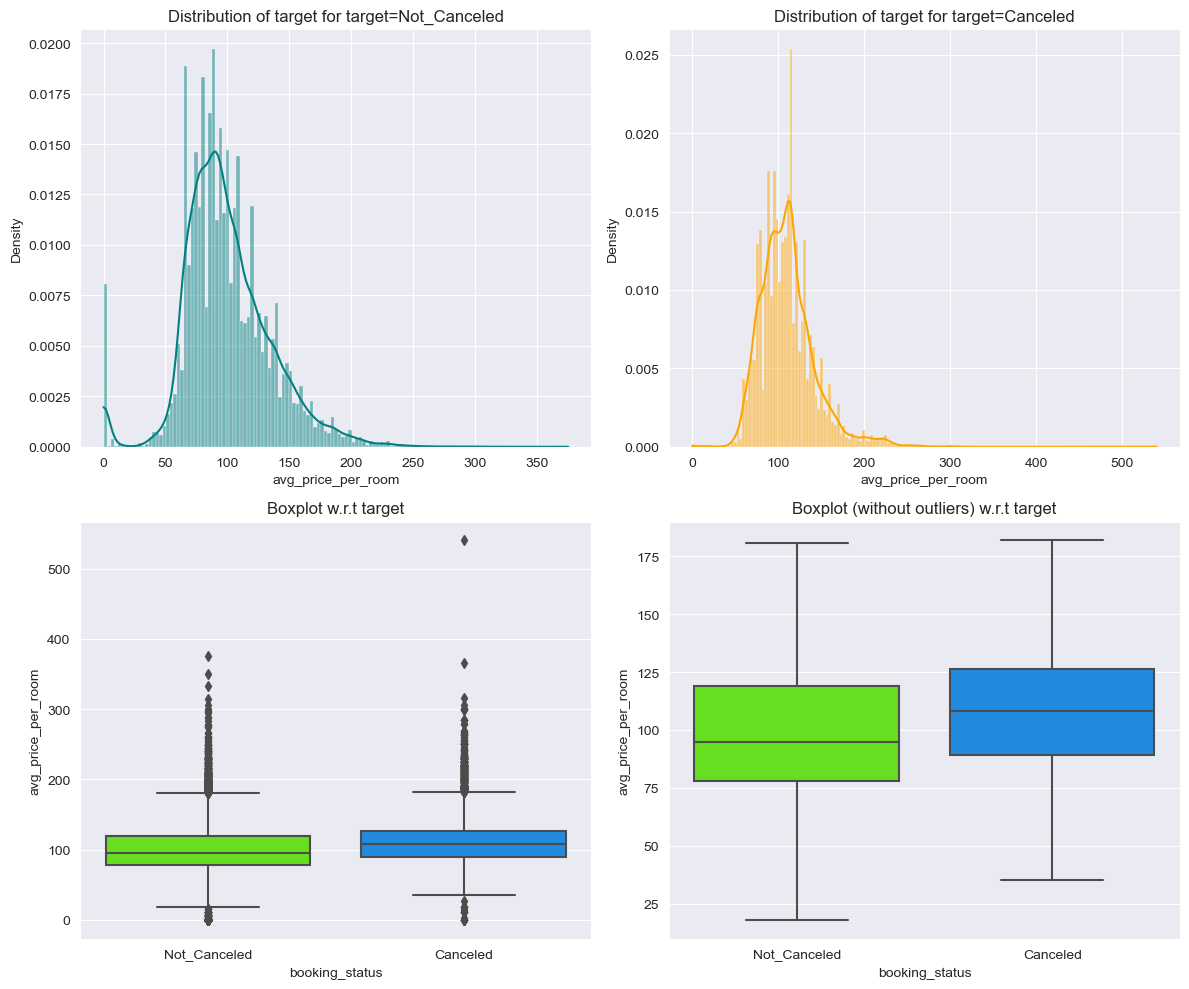

In [55]:
# perform a bivariate analysis of the variable against booking status
distribution_plot_wrt_target(df, 'avg_price_per_room', 'booking_status')

#### Observations:

Without any outliers, the Cancelled and Not_Canceled predictors show pretty normal distributions of avg_price_per_room in the box plot. The histograms, which have the outliers present are slightly right skewed, but still show a normal distribution curve on the left side of the graph. The Canceled boxplot is distributed over a higher range of prices than the Not_Canceled and therefore has a higher median value. 

### booking_status vs no_of_special_requests 

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


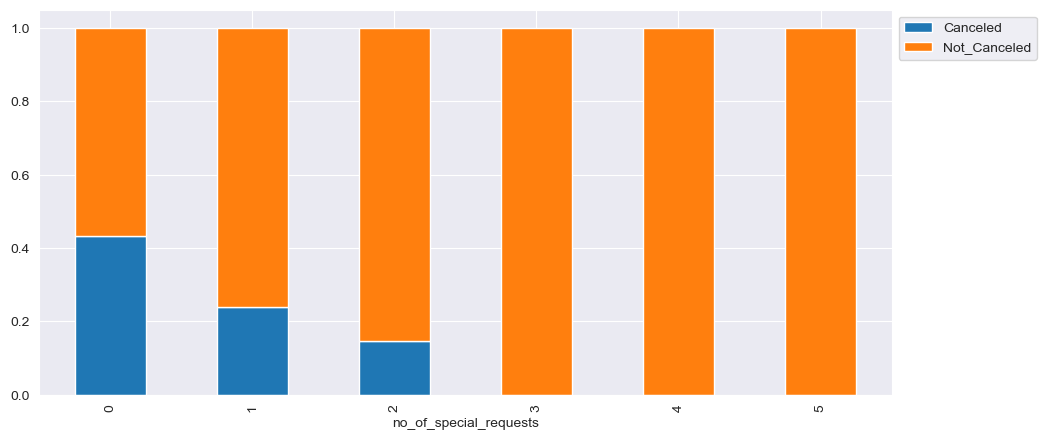

In [56]:
# perform a bivariate analysis of the variable against booking status
stacked_barplot(df, 'no_of_special_requests', 'booking_status')

#### Observations:

There actually is an interesting trend in this data, although like so many others, every variable other than 0 has a much lower frequency. This stacked barplot shows that when 0 special requests are made, there is a higher chance of cancellation, and that the more special requests that are made, the lower the chance becomes until 3 special requests made, in which case there were 0 Cancellations. This trend continued on from 3 until 5, which was the max number of special requests made.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### 1. What are the busiest months in the hotel?

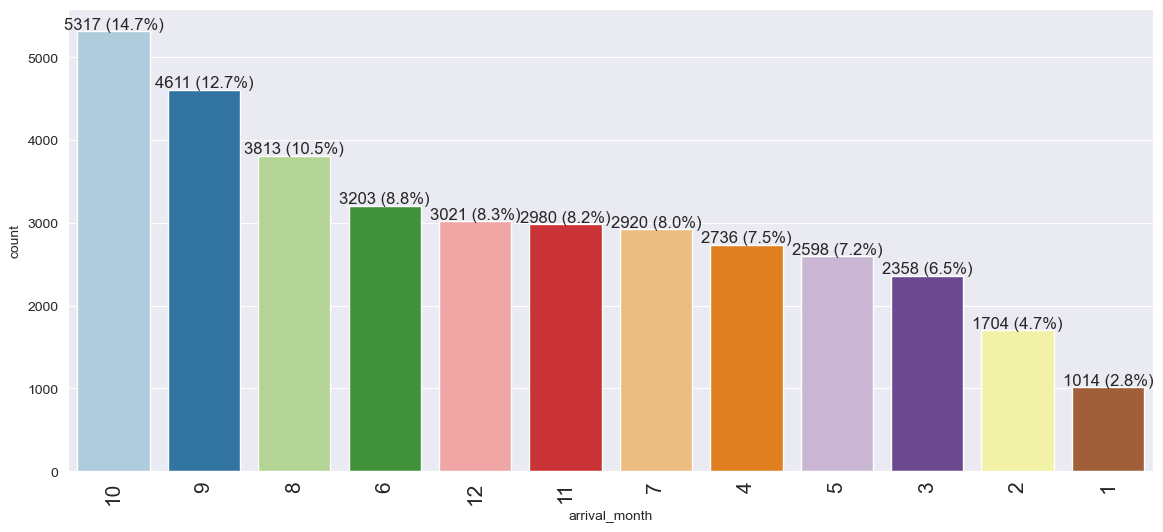

In [57]:
# perform a univariate analysis to answer the question
labeled_barplot(df, 'arrival_month', perc = True)

#### Observations: 

The busiest month at this hotel is month 10, presumably October

 ### 2. Which market segment do most of the guests come from?

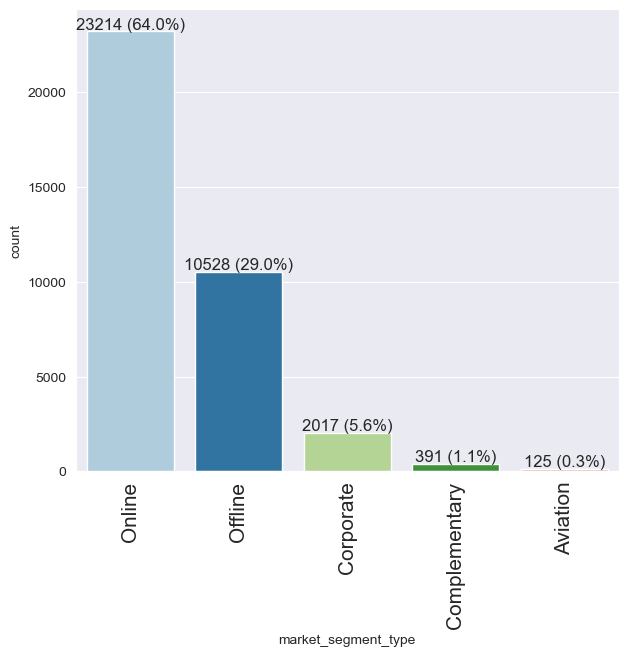

In [58]:
# perform a univariate analysis to answer the question
labeled_barplot(df, 'market_segment_type', perc = True)

#### Observations: 

Most guests come from the online Market Segment

### 3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

market_segment_type  avg_price_per_room
0            Aviation          100.704000
1       Complementary            3.141765
2           Corporate           82.911740
3             Offline           91.632679
4              Online          112.256855

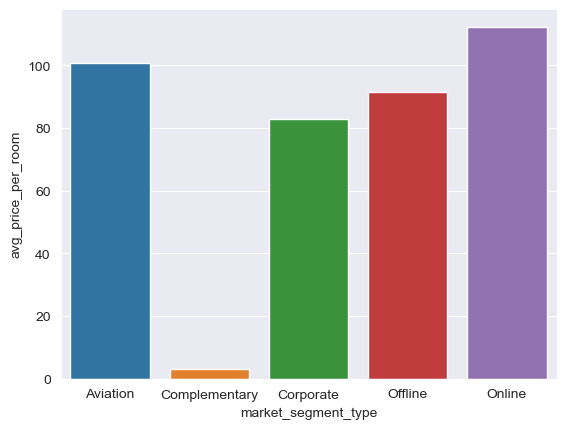

In [59]:
# Create a dataframe of market segment type grouped by their mean of avg price per room
segment_by_price1 = df.groupby('market_segment_type')['avg_price_per_room'].mean()
segment_by_price2 = pd.DataFrame({'market_segment_type': segment_by_price1.index, 'avg_price_per_room': segment_by_price1.values})
# create a barplot to present the results
sns.barplot(data = segment_by_price2, x = 'market_segment_type', y = 'avg_price_per_room')
segment_by_price2.head()

In [60]:
# describe the filtered dataframe
df[df['market_segment_type'] == 'Complementary']['avg_price_per_room'].describe()

count    391.000000
mean       3.141765
std       15.512972
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      170.000000
Name: avg_price_per_room, dtype: float64

#### Observations: 
* Online: 112 Euros
* Offline: 91.63 Euros
* Corporate: 82.91 Euros
* Aviation: 100.70 Euros
* Complimentary: 3.14 Euros

### 4. What percentage of bookings are canceled? 

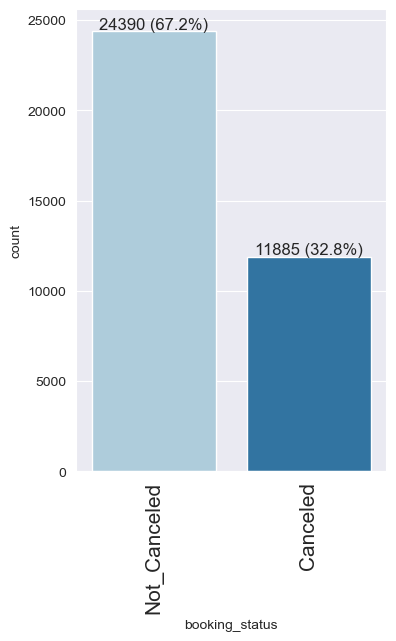

In [61]:
# perform a univariate analysis to answer the question
labeled_barplot(df, 'booking_status', perc = True)

#### Observations: 

32.8% of bookings in the dataset are cancelled

### 5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

booking_status  repeated_guest  percentage
0       Canceled              16     1.72043
1   Not_Canceled             914    98.27957

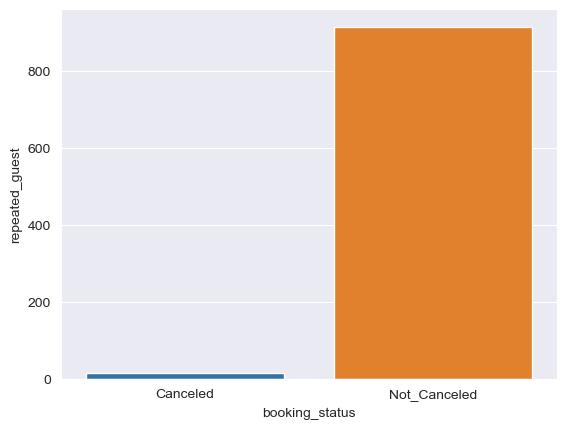

In [62]:
total_repeat_guests = df.groupby('booking_status')['repeated_guest'].sum()
total_repeat_guests2 = pd.DataFrame({'booking_status': total_repeat_guests.index, 
                                     'repeated_guest': total_repeat_guests.values,
                                     'percentage': (total_repeat_guests.values/ total_repeat_guests.sum()* 100)})
sns.barplot(data = total_repeat_guests2, 
            x = 'booking_status', 
            y = 'repeated_guest')
total_repeat_guests2.head()

#### Observations: 

Only 1.72% of repeat guests cancel their bookings

### 6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


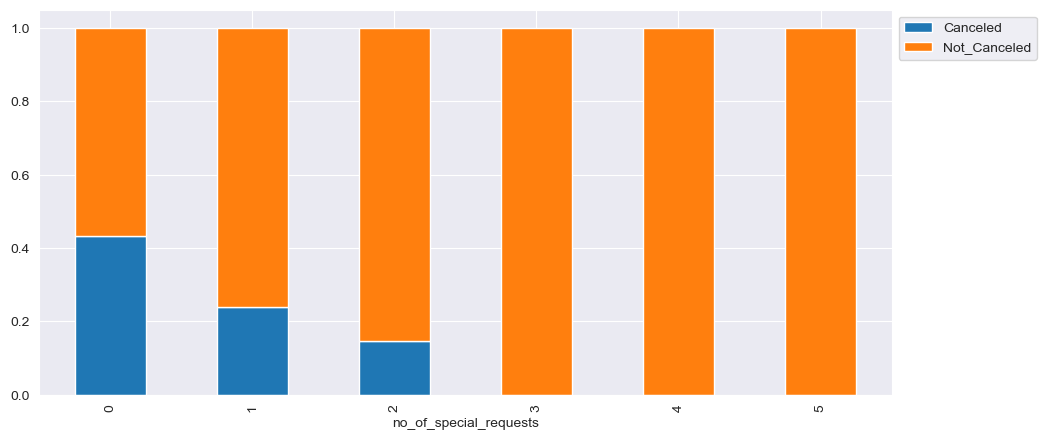

In [63]:
stacked_barplot(df, 'no_of_special_requests', 'booking_status')

#### Observations: 

Yes, the data shows that the more special requests that are made by the individual, the less likely the individual is to cancel the booking

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

#### Missing value treatment

In [64]:
# check again for any missing values
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

No missing values

#### Feature engineering

In [65]:
# create a copy of the CSV
df1 = data.copy()

In [66]:
# drop the ID series
df = df1.drop("Booking_ID", axis = 1)

#### Outlier detection and treatment

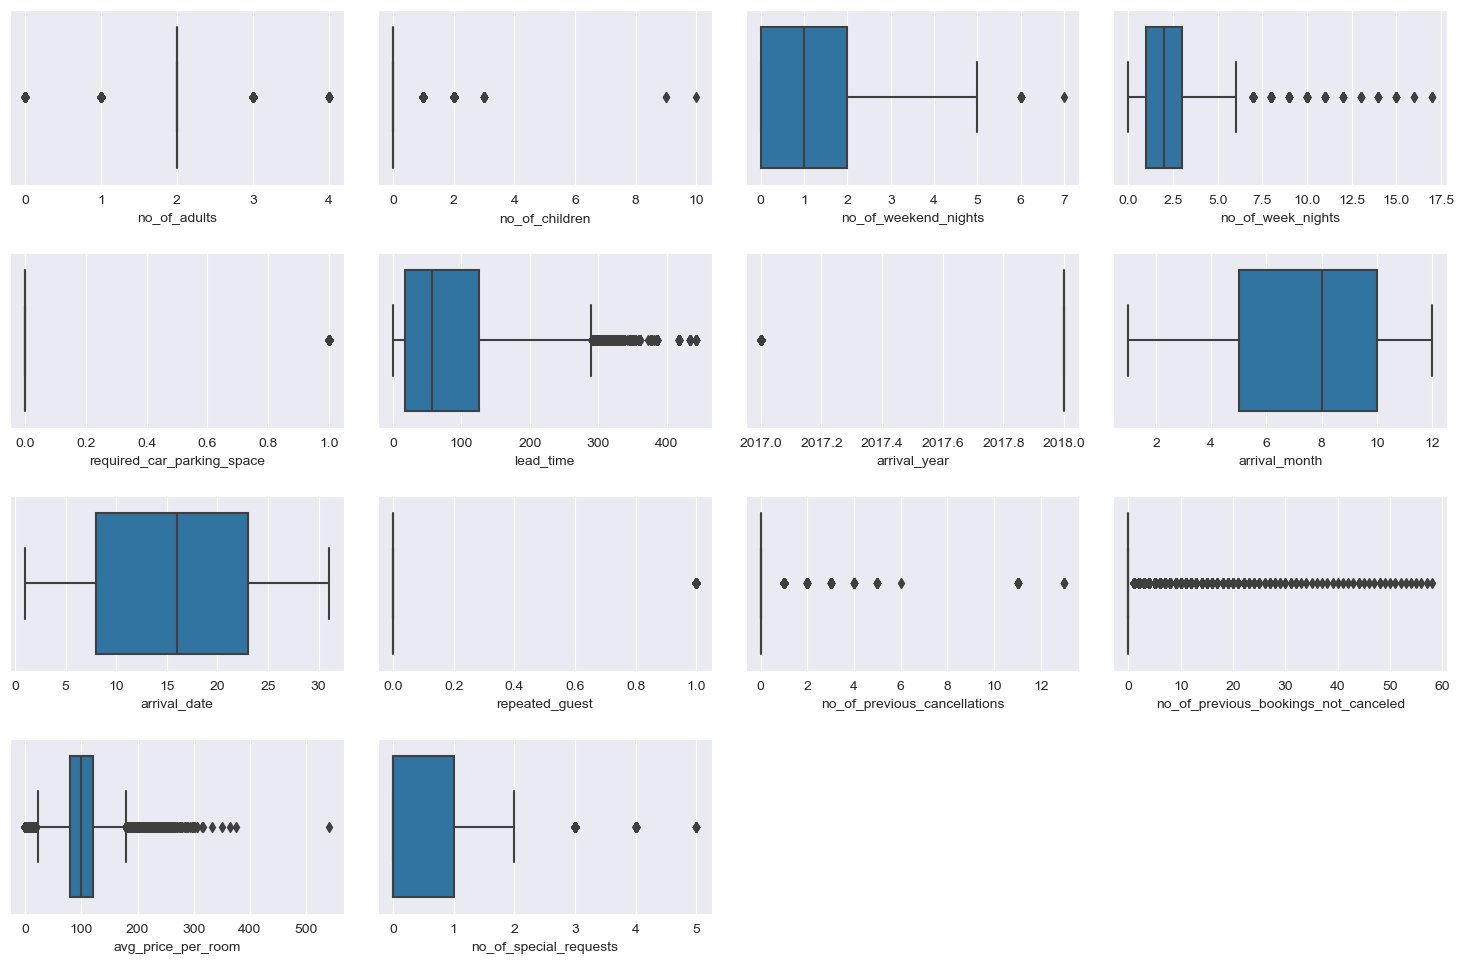

In [67]:
# outlier detection using boxplot from the MLS
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

Outliers will be included because they all seem to be reasonable values for their category

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [68]:
# Create a copy of the source data
#df = data.copy()

In [69]:
# change the booking_status categories to 1 or 0
df["booking_status"] = df["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

In [70]:
# defining X and y variables
X = df.drop(["booking_status"], axis=1)
y = df["booking_status"]

X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

# add contant X
X = sm.add_constant(X)

print(X.head())
print(y.head())

   const  no_of_adults  no_of_children  no_of_weekend_nights  \
0    1.0             2               0                     1   
1    1.0             2               0                     2   
2    1.0             1               0                     2   
3    1.0             2               0                     0   
4    1.0             2               0                     1   

   no_of_week_nights  required_car_parking_space  lead_time  arrival_year  \
0                  2                           0        224          2017   
1                  3                           0          5          2018   
2                  1                           0          1          2018   
3                  2                           0        211          2018   
4                  1                           0         48          2018   

   arrival_month  arrival_date  ...  room_type_reserved_Room_Type 2  \
0             10             2  ...                               0   
1         

In [71]:
# check X's info
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   const                                 36275 non-null  float64
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   lead_time                             36275 non-null  int64  
 7   arrival_year                          36275 non-null  int64  
 8   arrival_month                         36275 non-null  int64  
 9   arrival_date                          36275 non-null  int64  
 10  repeated_guest                        36275 non-null  int64  
 11  no_of_previous_

In [72]:
# Check X's head data
X.head()

const  no_of_adults  no_of_children  no_of_weekend_nights  \
0    1.0             2               0                     1   
1    1.0             2               0                     2   
2    1.0             1               0                     2   
3    1.0             2               0                     0   
4    1.0             2               0                     1   

   no_of_week_nights  required_car_parking_space  lead_time  arrival_year  \
0                  2                           0        224          2017   
1                  3                           0          5          2018   
2                  1                           0          1          2018   
3                  2                           0        211          2018   
4                  1                           0         48          2018   

   arrival_month  arrival_date  ...  room_type_reserved_Room_Type 2  \
0             10             2  ...                               0   
1             11             6  ...                               0   
2              2            28  ...                               0   
3              5            20  ...                               0   
4              4            11  ...                               0   

   room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   market_segment_type_Corporate  market_segment_type_Offline  \
0                              0                            1   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            0   

   market_segment_type_Online  
0                           0  
1                           1  
2                           1  
3                           1  
4                           1  

[5 rows x 28 columns]

In [73]:
# add contant X
#X = sm.add_constant(X)

In [74]:
# creating dummy variables
#X = pd.get_dummies(
#    X,
#    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
#    drop_first=True,
#)
#X.head()

In [75]:
# split the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [76]:
# print the number of rows in the train and test data
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 25392
Number of rows in test data = 10883


In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# function that checks the variance inflation factor
# this function comes from the MLS
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [78]:
# run the VIF function against the training data
checking_vif(x_train)

feature           VIF
0                                  const  3.946816e+07
1                           no_of_adults  1.348154e+00
2                         no_of_children  1.978229e+00
3                   no_of_weekend_nights  1.069475e+00
4                      no_of_week_nights  1.095667e+00
5             required_car_parking_space  1.039928e+00
6                              lead_time  1.394914e+00
7                           arrival_year  1.430830e+00
8                          arrival_month  1.275673e+00
9                           arrival_date  1.006738e+00
10                        repeated_guest  1.783516e+00
11          no_of_previous_cancellations  1.395689e+00
12  no_of_previous_bookings_not_canceled  1.651986e+00
13                    avg_price_per_room  2.050421e+00
14                no_of_special_requests  1.247278e+00
15         type_of_meal_plan_Meal Plan 2  1.271851e+00
16         type_of_meal_plan_Meal Plan 3  1.025216e+00
17        type_of_meal_plan_Not Selected  1.272183e+00
18        room_type_reserved_Room_Type 2  1.101438e+00
19        room_type_reserved_Room_Type 3  1.003302e+00
20        room_type_reserved_Room_Type 4  1.361515e+00
21        room_type_reserved_Room_Type 5  1.027810e+00
22        room_type_reserved_Room_Type 6  1.973072e+00
23        room_type_reserved_Room_Type 7  1.115123e+00
24     market_segment_type_Complementary  4.500109e+00
25         market_segment_type_Corporate  1.692844e+01
26           market_segment_type_Offline  6.411392e+01
27            market_segment_type_Online  7.117643e+01

In [79]:
# change the variable name
x_train1 = x_train

## Building a Logistic Regression model

In [80]:
# fitting logistic regression model
logit = sm.Logit(y_train, x_train1.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.3293
Time:                        14:11:55   Log-Likelihood:                -10793.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -924.5923    120.817     -7.653      0.000   -1161.390    -687.795
no_of_adults                             0.1135      

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Model performance evaluation

In [81]:
# function from MLS
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [82]:
# function from MLS
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

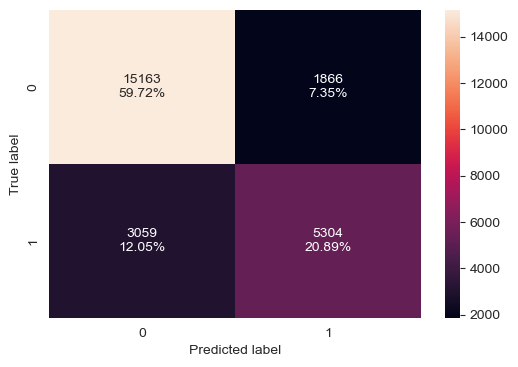

In [83]:
# run a confusion matrix
confusion_matrix_statsmodels(lg, x_train1, y_train)

In [84]:
# Print the Training Performance 
print("Training performance:")
model_performance_classification_statsmodels(lg, x_train1, y_train)

Training performance:


Accuracy    Recall  Precision        F1
0  0.806041  0.634222   0.739749  0.682933

In [85]:
# drop highest value variable
x_train2 = x_train1.drop('market_segment_type_Complementary', axis = 1)

In [86]:
# fitting logistic regression model
logit = sm.Logit(y_train, x_train2.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.3284
Time:                        14:11:55   Log-Likelihood:                -10807.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -924.3903    120.609     -7.664      0.000   -1160.780    -688.000
no_of_adults                             0.1065      

In [87]:
x_train3 = x_train2.drop('room_type_reserved_Room_Type 3', axis = 1)

In [88]:
# fitting logistic regression model
logit = sm.Logit(y_train, x_train3.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25366
Method:                           MLE   Df Model:                           25
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.3284
Time:                        14:11:55   Log-Likelihood:                -10807.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -924.3678    120.609     -7.664      0.000   -1160.757    -687.979
no_of_adults                             0.1065      

In [89]:
# drop highest value variable
x_train4 = x_train3.drop('arrival_date', axis = 1)

In [90]:
# fitting logistic regression model
logit = sm.Logit(y_train, x_train4.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25367
Method:                           MLE   Df Model:                           24
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.3284
Time:                        14:11:55   Log-Likelihood:                -10807.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -924.3411    120.612     -7.664      0.000   -1160.737    -687.945
no_of_adults                             0.1067      

In [91]:
# drop highest value variable
x_train5 = x_train4.drop('market_segment_type_Online', axis = 1)

In [92]:
# fitting logistic regression model
logit = sm.Logit(y_train, x_train5.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25368
Method:                           MLE   Df Model:                           23
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.3284
Time:                        14:11:55   Log-Likelihood:                -10807.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -921.5770    120.475     -7.650      0.000   -1157.704    -685.450
no_of_adults                             0.1086      

In [93]:
# drop highest value variable
x_train7 = x_train5.drop('no_of_previous_bookings_not_canceled', axis = 1)

In [94]:
# fitting logistic regression model
logit = sm.Logit(y_train, x_train7.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25369
Method:                           MLE   Df Model:                           22
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.3283
Time:                        14:11:55   Log-Likelihood:                -10808.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -919.9661    120.487     -7.635      0.000   -1156.117    -683.816
no_of_adults                       0.1086      0.037      2.913      0.

In [95]:
# drop highest value variable
x_train6 = x_train7.drop('type_of_meal_plan_Meal Plan 3', axis = 1)

In [96]:
# fitting logistic regression model
logit = sm.Logit(y_train, x_train6.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.3283
Time:                        14:11:56   Log-Likelihood:                -10809.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -917.2860    120.456     -7.615      0.000   -1153.376    -681.196
no_of_adults                       0.1086      0.037      2.914      0.

### Checking performance of the new model

#### Training set performance

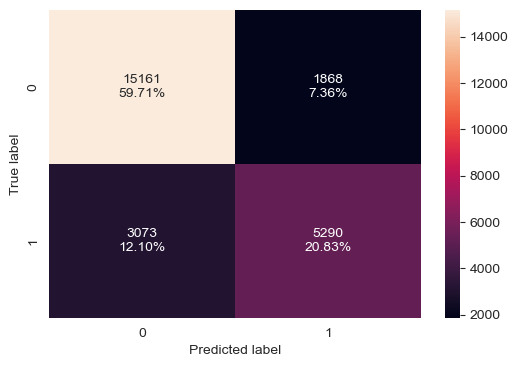

In [97]:
# run a confusion matrix
confusion_matrix_statsmodels(lg, x_train6, y_train)

In [98]:
# print out Training Performance
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg, x_train6, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.805411  0.632548   0.739033  0.681657

#### Test performance

In [99]:
# create a columns list of the final model
x_test6 = x_test[list(x_train6.columns)]

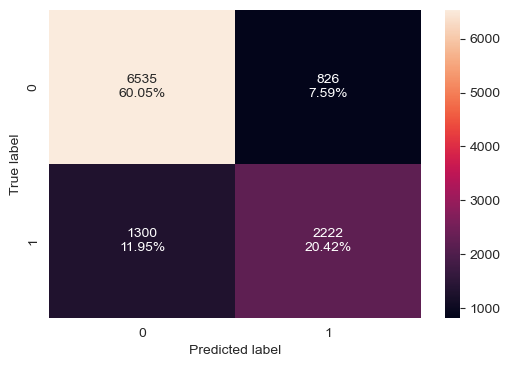

In [100]:
# run a confusion matrix
confusion_matrix_statsmodels(lg, x_test6, y_test)

In [101]:
# print out the Test Performance
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg, x_test6, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy    Recall  Precision        F1
0  0.804649  0.630892   0.729003  0.676408

### Model Performance Improvement

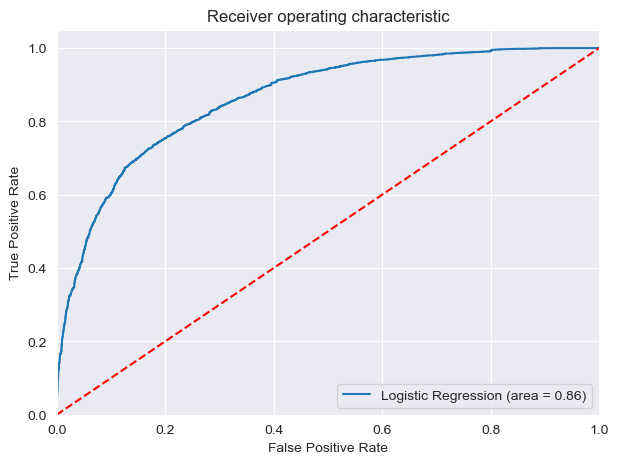

In [102]:
# run an ROC-AUC curve
logit_roc_auc_train = roc_auc_score(y_train, lg.predict(x_train6))
fpr, tpr, thresholds = roc_curve(y_train, lg.predict(x_train6))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Optimal threshold using AUC-ROC curve

In [103]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict(x_train6))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.37104666234886813


#### Checking model performance on training set

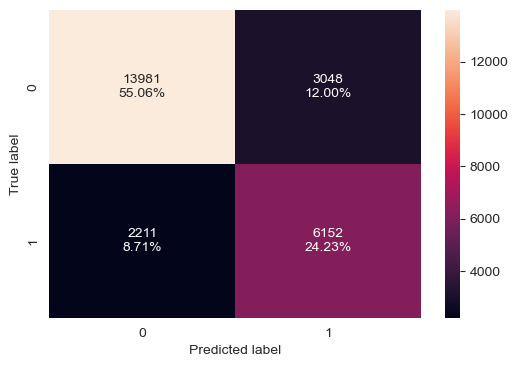

In [104]:
# run a confusion matrix
confusion_matrix_statsmodels(
    lg, x_train6, y_train, threshold=optimal_threshold_auc_roc
)

In [105]:
# print out the Training Performance
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg, x_train6, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision        F1
0  0.792888  0.735621   0.668696  0.700564

#### Checking model performance on test set

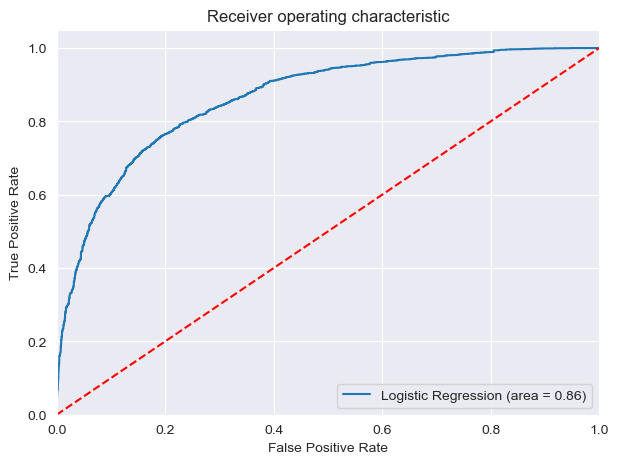

In [106]:
# run an ROC_AUC curve
logit_roc_auc_train = roc_auc_score(y_test, lg.predict(x_test6))
fpr, tpr, thresholds = roc_curve(y_test, lg.predict(x_test6))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

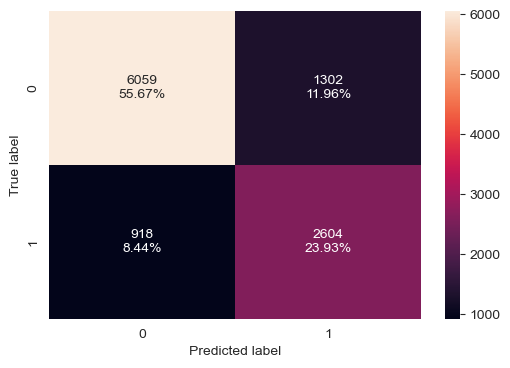

In [107]:
# run a confusion matrix
confusion_matrix_statsmodels(lg, x_test6, y_test, threshold=optimal_threshold_auc_roc)

In [108]:
# print out the Test Performance
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg, x_test6, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy    Recall  Precision        F1
0  0.796012  0.739353   0.666667  0.701131

### Precision-Recall Curve

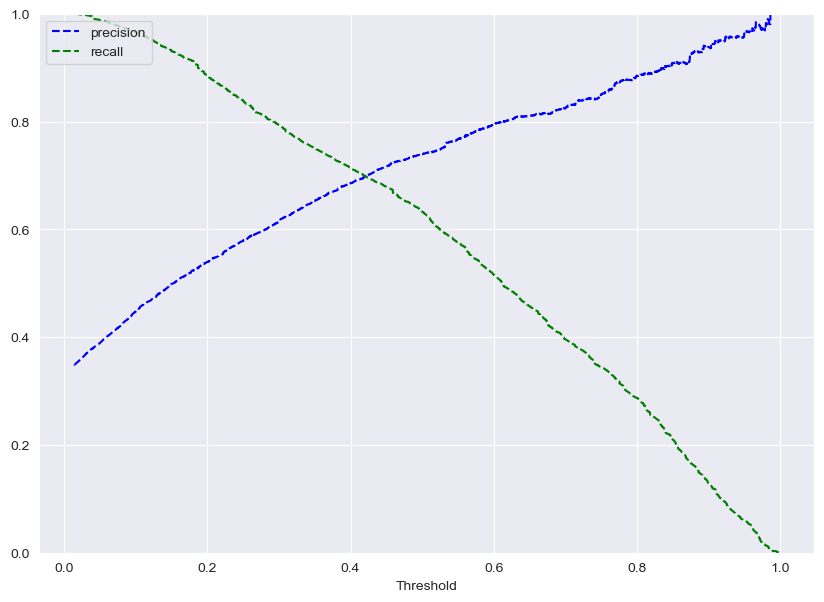

In [109]:
# function comes from MLS

y_scores = lg.predict(x_train6)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [110]:
# setting the threshold
optimal_threshold_curve = 0.41

#### Checking model performance on training set

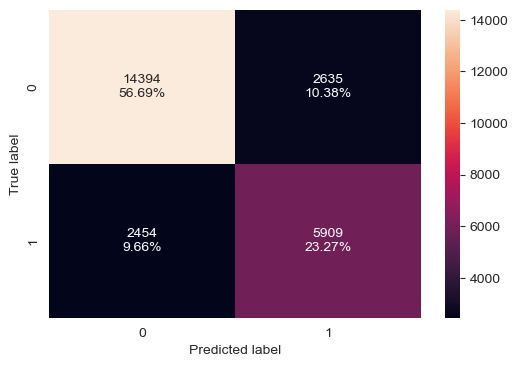

In [111]:
# run a confusion matrix
confusion_matrix_statsmodels(lg, x_train6, y_train, threshold=optimal_threshold_curve)

In [112]:
# print out the Training Performance
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg, x_train6, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision     F1
0  0.799583  0.706565   0.691596  0.699

#### Checking model performance on test set

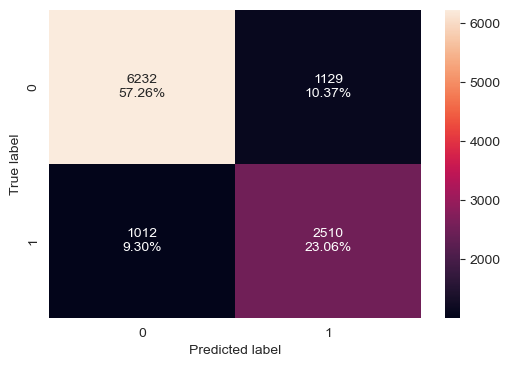

In [113]:
# run a confusion matrix
confusion_matrix_statsmodels(lg, x_test6, y_test, threshold=optimal_threshold_curve)

In [114]:
# print out the Testing Performance
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg, x_test6, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy    Recall  Precision        F1
0  0.803271  0.712663    0.68975  0.701019

## Final Model Summary

In [115]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.76 Threshold",
    "Logistic Regression-0.58 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                      0.805411   
Recall                                        0.632548   
Precision                                     0.739033   
F1                                            0.681657   

           Logistic Regression-0.76 Threshold  \
Accuracy                             0.792888   
Recall                               0.735621   
Precision                            0.668696   
F1                                   0.700564   

           Logistic Regression-0.58 Threshold  
Accuracy                             0.799583  
Recall                               0.706565  
Precision                            0.691596  
F1                                   0.699000

In [116]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.76 Threshold",
    "Logistic Regression-0.58 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                      0.804649   
Recall                                        0.630892   
Precision                                     0.729003   
F1                                            0.676408   

           Logistic Regression-0.76 Threshold  \
Accuracy                             0.796012   
Recall                               0.739353   
Precision                            0.666667   
F1                                   0.701131   

           Logistic Regression-0.58 Threshold  
Accuracy                             0.803271  
Recall                               0.712663  
Precision                            0.689750  
F1                                   0.701019

- Almost all the three models are very similar on both training and test data without the problem of overfitting
- The model with a threshold of 0.76 is giving the best F1 score. Therefore it can be selected as the final model

## Building a Decision Tree model

In [117]:
# create a the decision tree variable
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train6, y_train)

DecisionTreeClassifier(random_state=1)

In [118]:
# print out train and test accuracy scores
print("Accuracy on training set : ",dTree.score(x_train6, y_train))
print("Accuracy on test set : ",dTree.score(x_test6, y_test))

Accuracy on training set :  0.9935412728418399
Accuracy on test set :  0.8671322245704309


In [119]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(x_test6)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [120]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(x_train6)
    pred_test = model.predict(x_test6)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

In [121]:
# Recall on train and test
get_recall_score(dTree)

Recall on training set :  0.9846944876240583
Recall on test set :  0.8018171493469619


In [122]:
# create dataframe for model scores
Model1 = 'Initial Decision Tree Model'
Train_Acc1 = 0.99
Train_Recall1 = 0.98
Test_Acc1 = 0.86
Test_Recall1 = 0.80

comparison_frame = pd.DataFrame({'Model':[Model1],
                                 'Train_Recall':[Train_Recall1], 
                                 'Test_Recall':[Test_Recall1],
                                 'Train_Accuracy':[Train_Acc1],
                                 'Test_Accuracy':[Test_Acc1]}) 
comparison_frame

Model  Train_Recall  Test_Recall  Train_Accuracy  \
0  Initial Decision Tree Model          0.98          0.8            0.99   

   Test_Accuracy  
0           0.86

In [123]:
# create feature names
feature_names = list(X.columns)
print(feature_names)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


### Visualizing Decision Tree 1

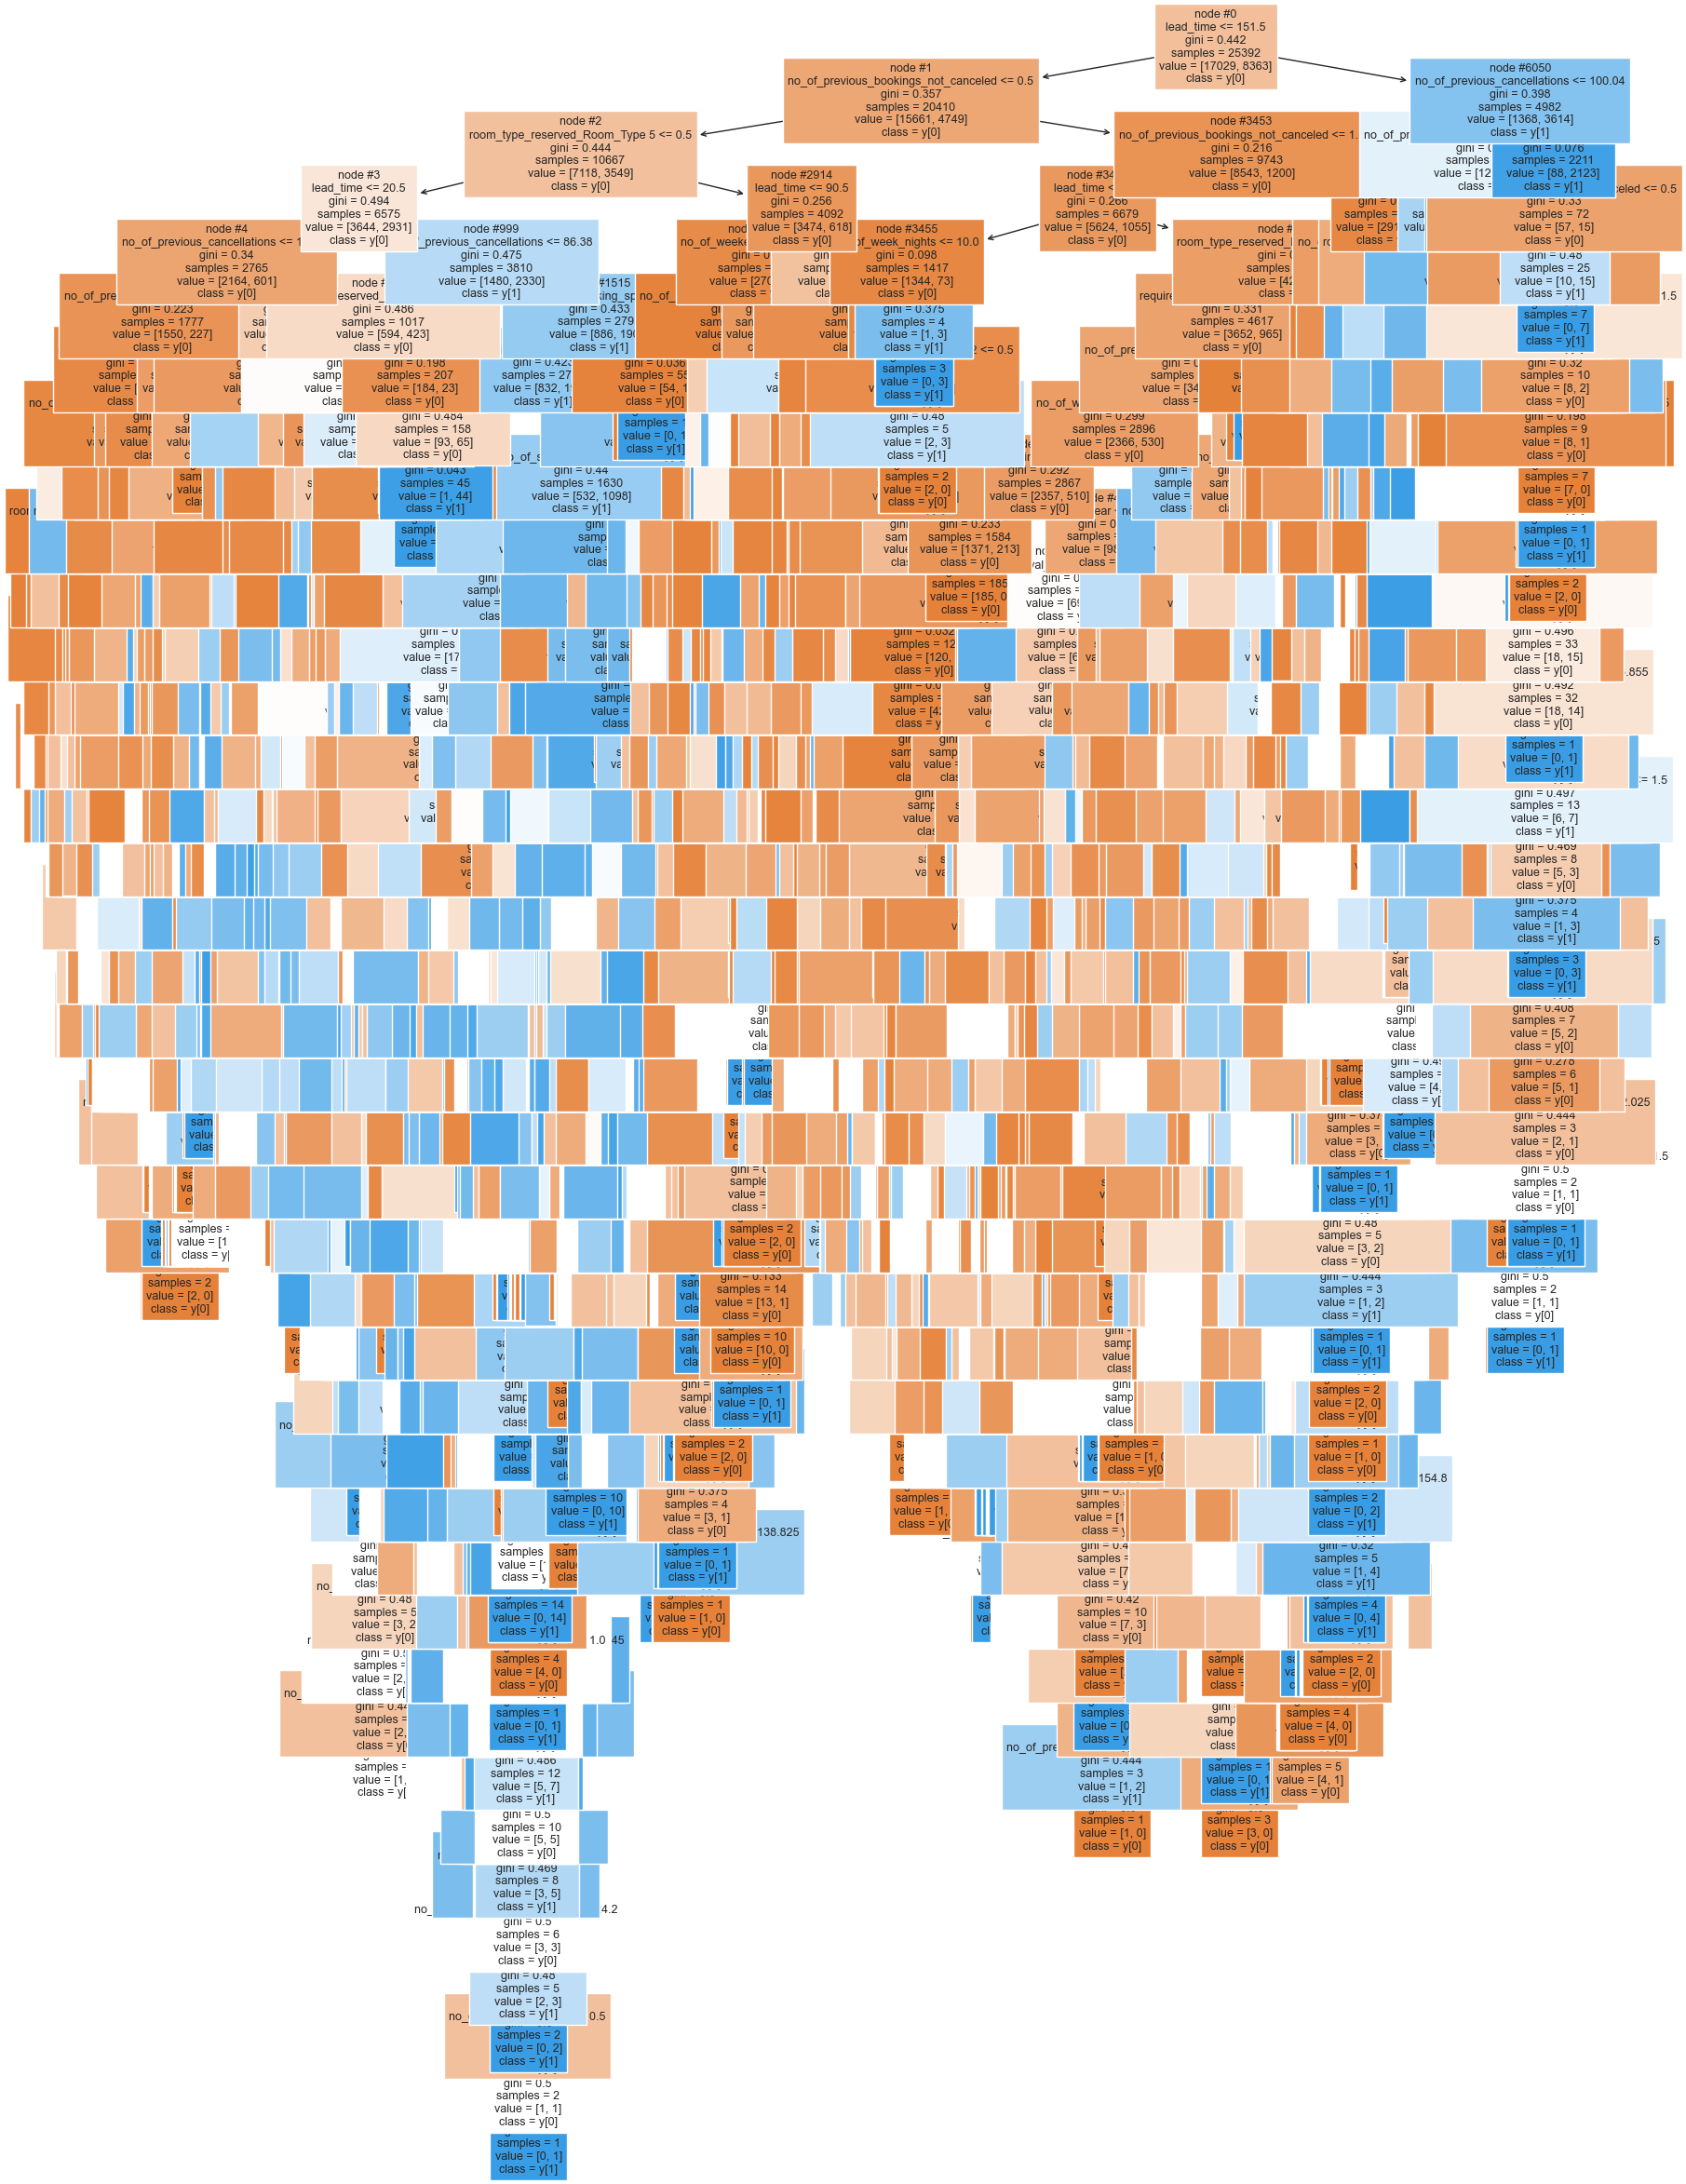

In [125]:
# present Decision Tree
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

## Do we need to prune the tree?

In [126]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = x_train6.columns).sort_values(by = 'Imp', ascending = False))

                                     Imp
lead_time                       0.394584
avg_price_per_room              0.199281
arrival_month                   0.078105
no_of_special_requests          0.068036
market_segment_type_Offline     0.059178
no_of_week_nights               0.058022
no_of_weekend_nights            0.045708
no_of_adults                    0.035081
arrival_year                    0.014460
type_of_meal_plan_Not Selected  0.009358
market_segment_type_Corporate   0.007848
room_type_reserved_Room_Type 4  0.007525
required_car_parking_space      0.006583
type_of_meal_plan_Meal Plan 2   0.005962
no_of_children                  0.005305
room_type_reserved_Room_Type 2  0.002136
room_type_reserved_Room_Type 5  0.001225
repeated_guest                  0.000842
room_type_reserved_Room_Type 6  0.000670
no_of_previous_cancellations    0.000091
room_type_reserved_Room_Type 7  0.000000
const                           0.000000


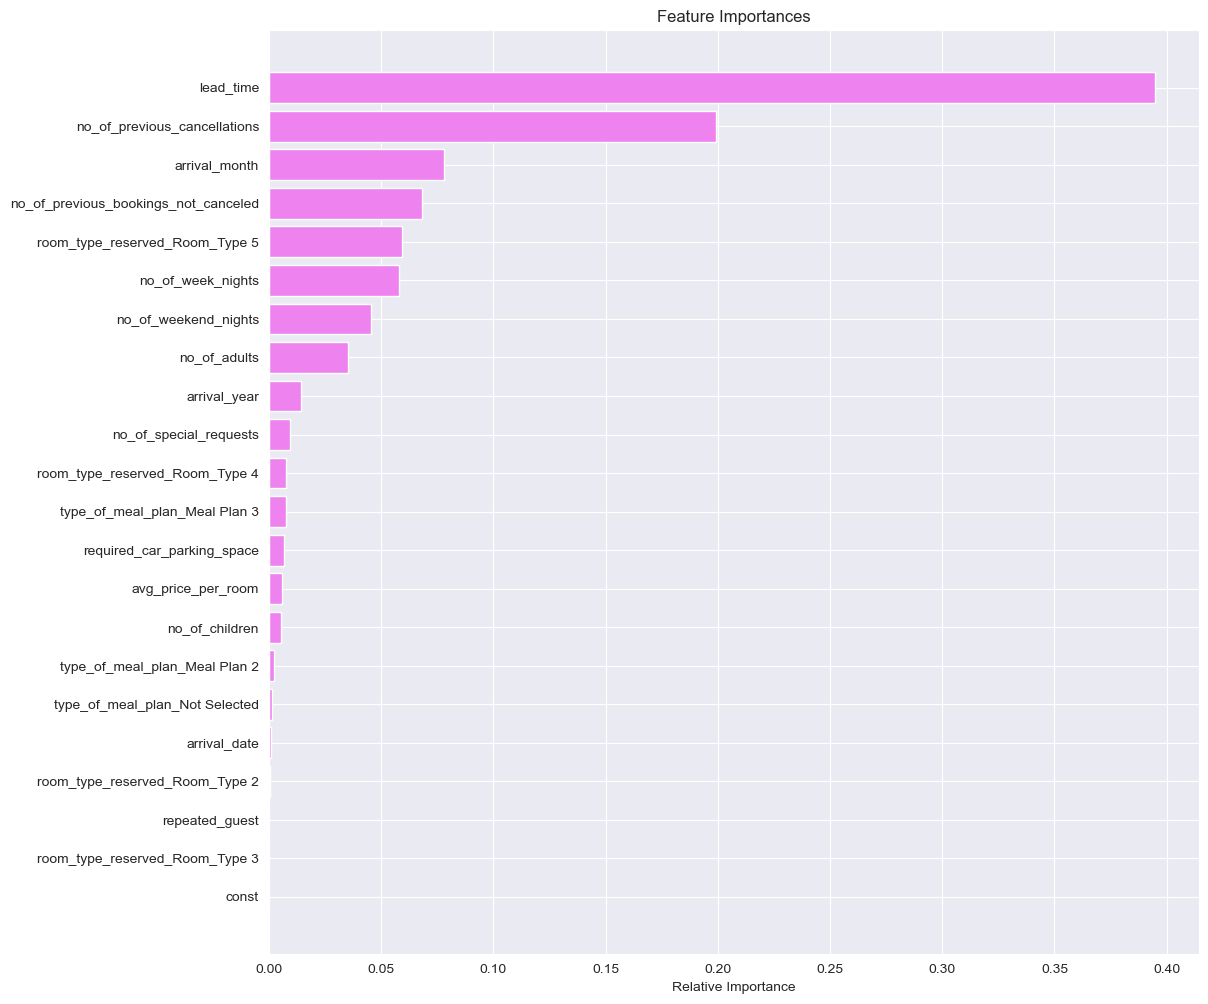

In [127]:
# present importance features in graph
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [128]:
# create next decision tree variable
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dTree1.fit(x_train6, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

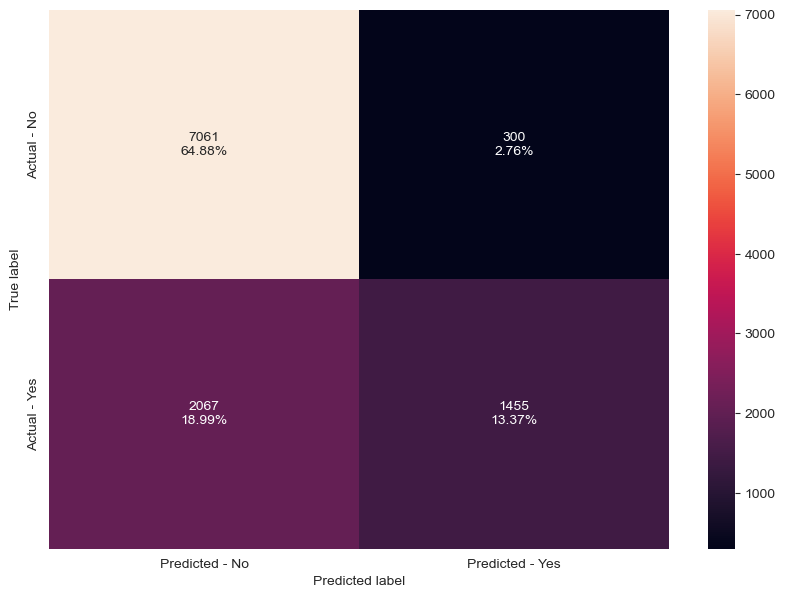

In [129]:
# run a confusion matrix
make_confusion_matrix(dTree1, y_test)

In [130]:
# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(x_train6, y_train))
print("Accuracy on test set : ",dTree1.score(x_test6, y_test))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.7740233144297417
Accuracy on test set :  0.7825048240374897
Recall on training set :  0.4005739567140978
Recall on test set :  0.4131175468483816


In [131]:
# create dataframe for model scores
Model2 = 'Decision Tree with Restricted Maximum Depth'
Train_Acc2 = 0.77
Train_Recall2 = 0.40
Test_Acc2 = 0.78
Test_Recall2 = 0.41

comparison_frame = pd.DataFrame({'Model':[Model2],
                                 'Train_Recall':[Train_Recall2], 
                                 'Test_Recall':[Test_Recall2],
                                 'Train_Accuracy':[Train_Acc2],
                                 'Test_Accuracy':[Test_Recall2]}) 
comparison_frame

Model  Train_Recall  Test_Recall  \
0  Decision Tree with Restricted Maximum Depth           0.4         0.41   

   Train_Accuracy  Test_Accuracy  
0            0.77           0.41

### Visualizing Decision Tree 2

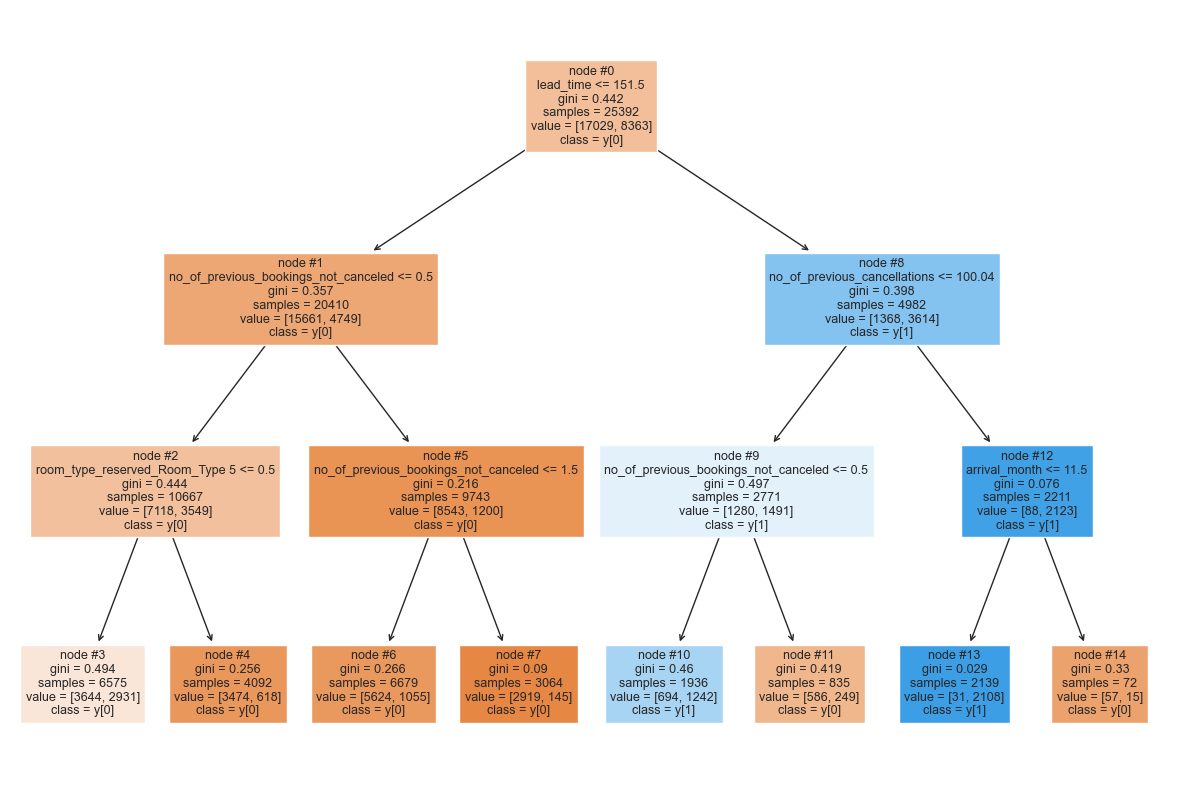

In [132]:
# present Decision Tree
plt.figure(figsize=(15,10))
tree.plot_tree(dTree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [133]:
# print important feature scores
print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = x_train6.columns).sort_values(by = 'Imp', ascending = False))

                                     Imp
lead_time                       0.549090
no_of_special_requests          0.179630
avg_price_per_room              0.123760
market_segment_type_Offline     0.123760
arrival_month                   0.023761
no_of_week_nights               0.000000
type_of_meal_plan_Not Selected  0.000000
market_segment_type_Corporate   0.000000
room_type_reserved_Room_Type 7  0.000000
room_type_reserved_Room_Type 6  0.000000
room_type_reserved_Room_Type 5  0.000000
room_type_reserved_Room_Type 4  0.000000
room_type_reserved_Room_Type 2  0.000000
type_of_meal_plan_Meal Plan 2   0.000000
required_car_parking_space      0.000000
no_of_children                  0.000000
no_of_adults                    0.000000
no_of_previous_cancellations    0.000000
repeated_guest                  0.000000
arrival_year                    0.000000
no_of_weekend_nights            0.000000
const                           0.000000


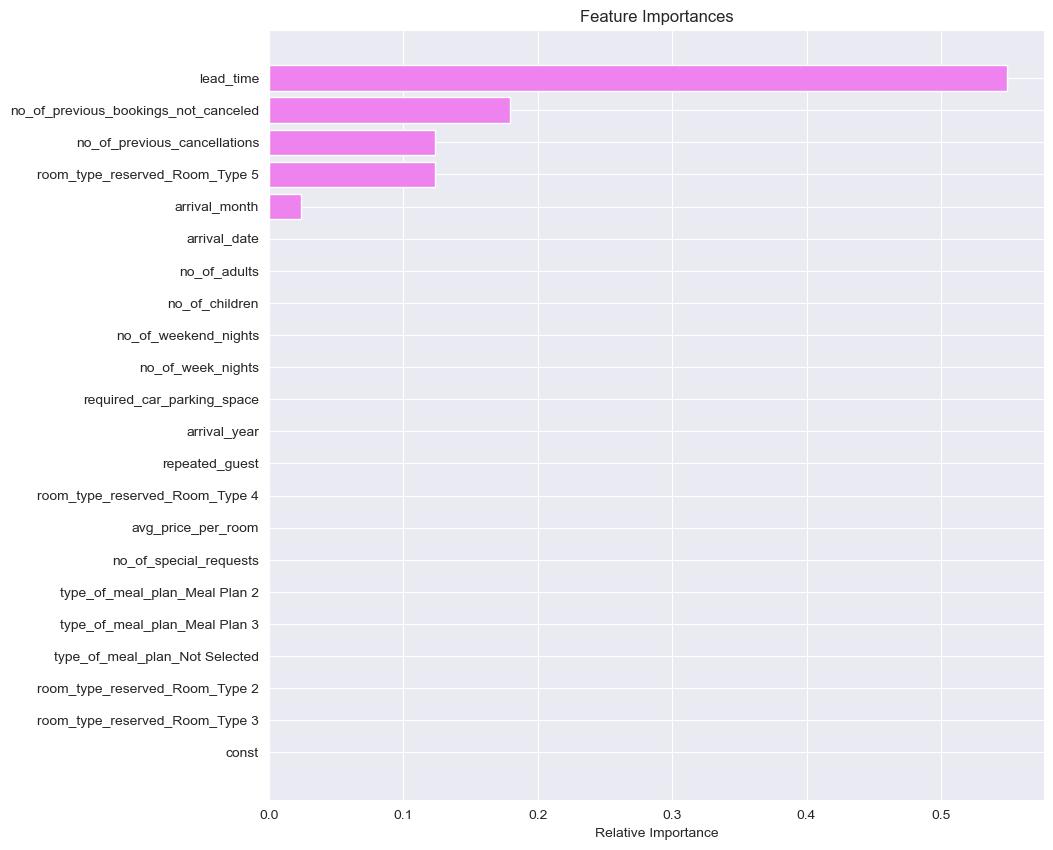

In [134]:
# show graph representation of importance scores
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Using GridSearch for Hyperparameter tuning of our tree model

In [135]:
from sklearn.model_selection import GridSearchCV

In [136]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train6, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(x_train6, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10,
                       min_impurity_decrease=0.01, random_state=1)

### Confusion Matrix - decision tree with tuned hyperparameters

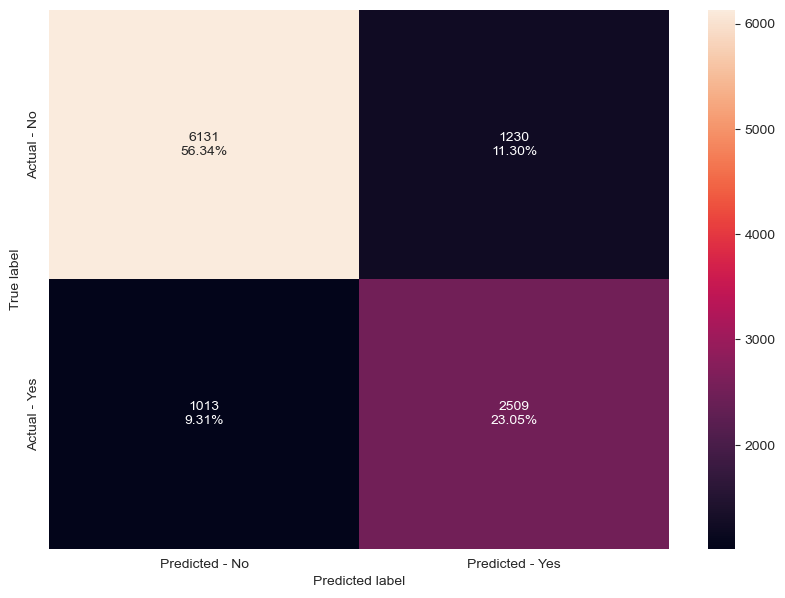

In [137]:
# run a confusion matrix
make_confusion_matrix(estimator,y_test)

In [138]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(x_train6, y_train))
print("Accuracy on test set : ",estimator.score(x_test6, y_test))
# Recall on train and test
get_recall_score(estimator)

Accuracy on training set :  0.792572463768116
Accuracy on test set :  0.7938987411559313
Recall on training set :  0.7107497309577903
Recall on test set :  0.7123793299261784


In [139]:
# create dataframe for model scores
Model3 = 'Decision Tree with Hyperparameter Tuning'
Train_Acc3 = 0.79
Train_Recall3 = 0.71
Test_Acc3 = 0.79
Test_Recall3 = 0.71

comparison_frame = pd.DataFrame({'Model':[Model3],
                                 'Train_Recall':[Train_Recall3], 
                                 'Test_Recall':[Test_Recall3],
                                 'Train_Accuracy':[Train_Acc3],
                                 'Test_Accuracy':[Test_Acc3]}) 
comparison_frame

Model  Train_Recall  Test_Recall  \
0  Decision Tree with Hyperparameter Tuning          0.71         0.71   

   Train_Accuracy  Test_Accuracy  
0            0.79           0.79

### Visualizing the Decision Tree

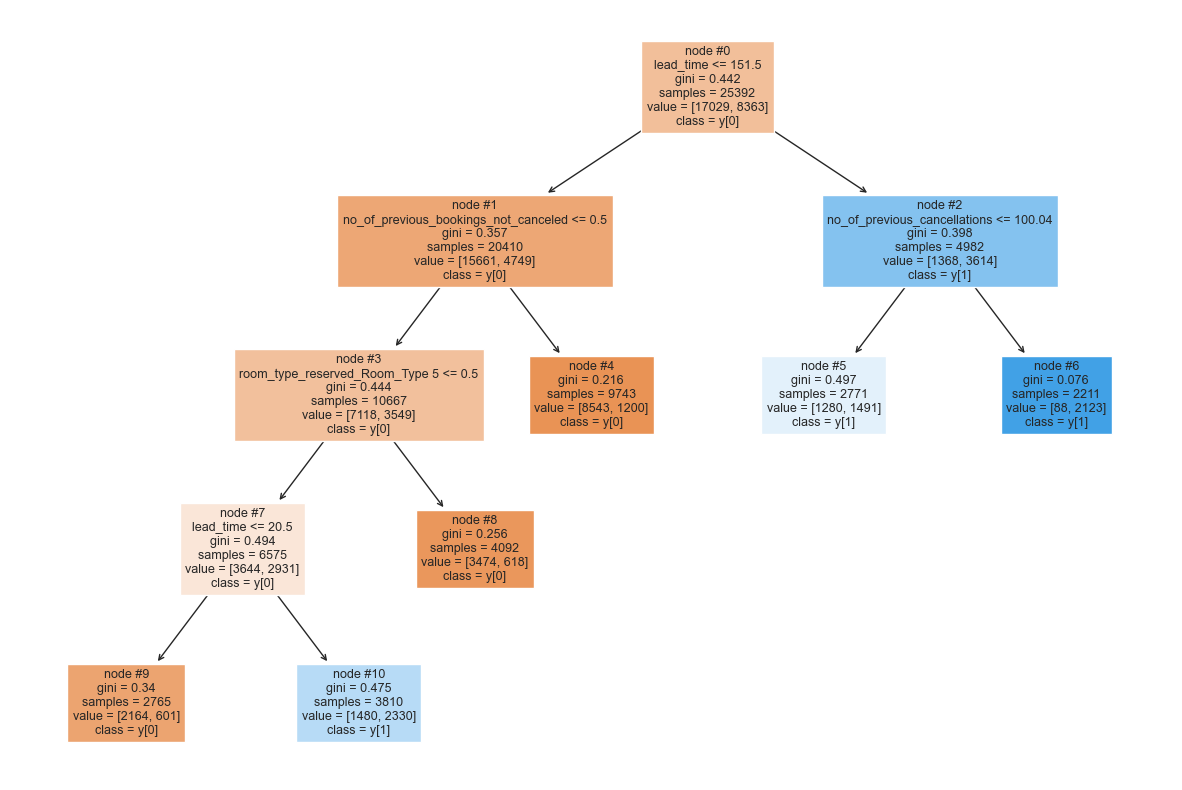

In [140]:
# present decision tree
plt.figure(figsize=(15,10))

tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [141]:
# show importance feature scores
print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = x_train6.columns).sort_values(by = 'Imp', ascending = False))

                                     Imp
lead_time                       0.648522
no_of_special_requests          0.118735
avg_price_per_room              0.116371
market_segment_type_Offline     0.116371
no_of_week_nights               0.000000
required_car_parking_space      0.000000
market_segment_type_Corporate   0.000000
room_type_reserved_Room_Type 7  0.000000
room_type_reserved_Room_Type 6  0.000000
room_type_reserved_Room_Type 5  0.000000
room_type_reserved_Room_Type 4  0.000000
room_type_reserved_Room_Type 2  0.000000
type_of_meal_plan_Not Selected  0.000000
type_of_meal_plan_Meal Plan 2   0.000000
no_of_children                  0.000000
no_of_adults                    0.000000
no_of_previous_cancellations    0.000000
repeated_guest                  0.000000
arrival_month                   0.000000
arrival_year                    0.000000
no_of_weekend_nights            0.000000
const                           0.000000


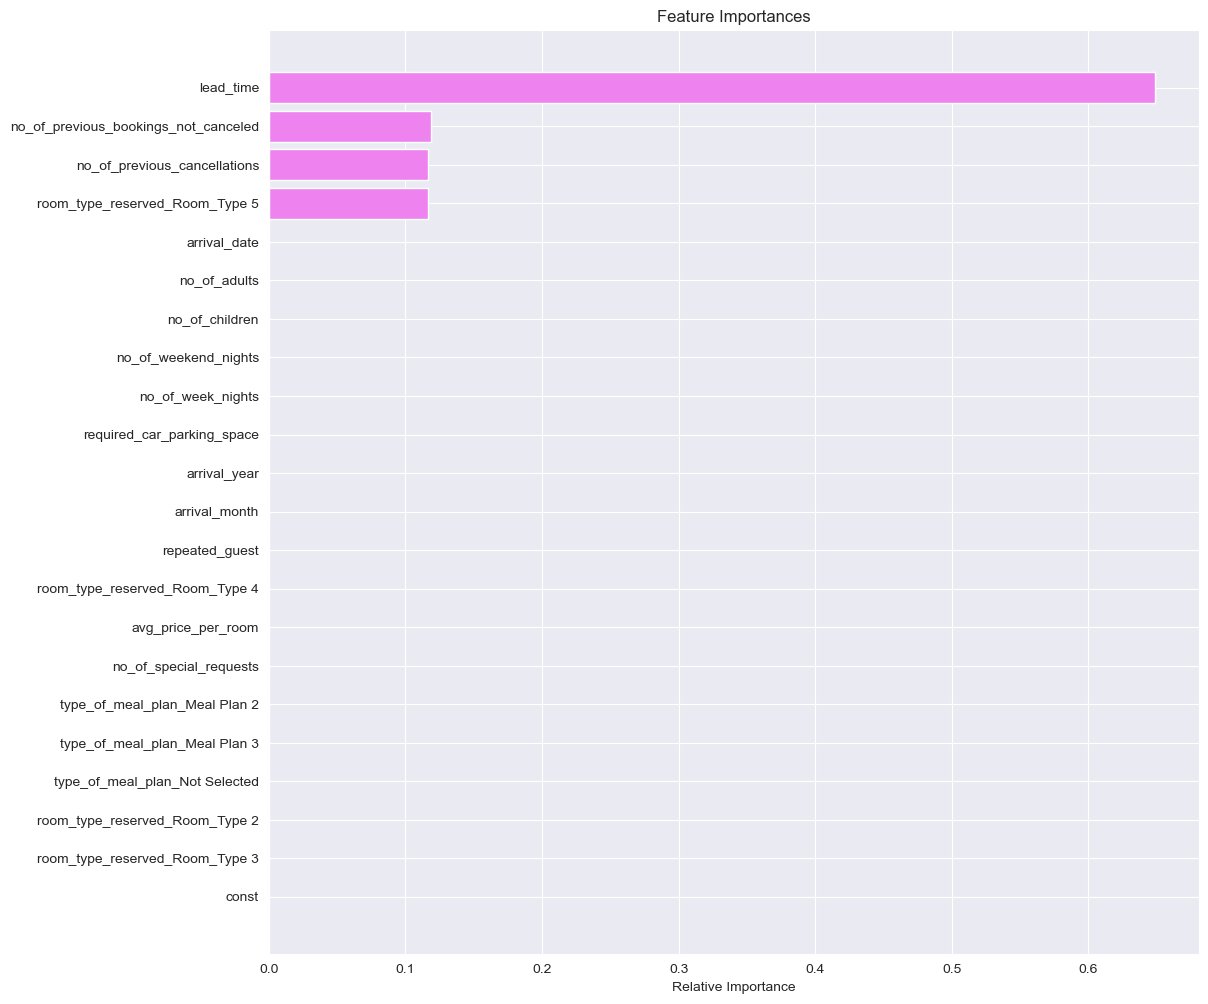

In [142]:
# show the importance scores in a graph
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Cost Complexity Pruning

In [143]:
# determine the ccp alphas and impurities
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(x_train6, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000e+00    0.008309
1     1.842455e-07    0.008309
2     2.895771e-07    0.008309
3     4.688391e-07    0.008310
4     5.329960e-07    0.008310
...            ...         ...
1434  4.542523e-03    0.280273
1435  6.585026e-03    0.293443
1436  1.725993e-02    0.310703
1437  1.815996e-02    0.365183
1438  7.657789e-02    0.441761

[1439 rows x 2 columns]

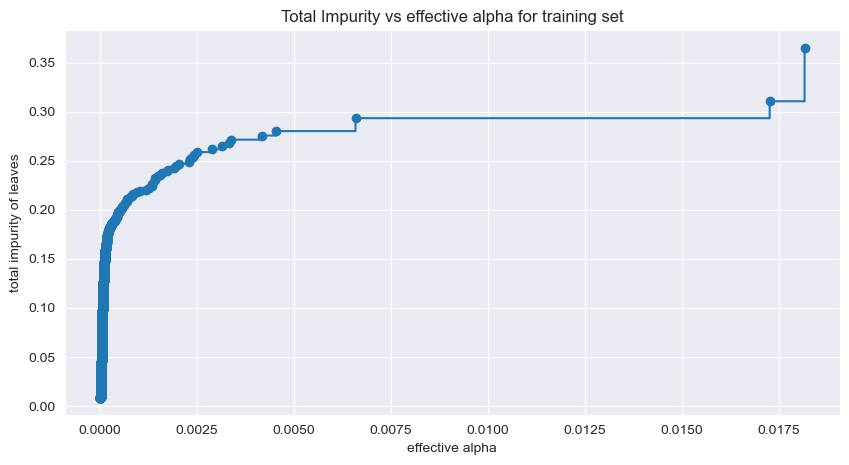

In [144]:
# show the total impurities and ccp alphas in a graph
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [145]:
# run a for loop to determine the number of nodes in the last tree with its alpha value
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(x_train6, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07657789477371368


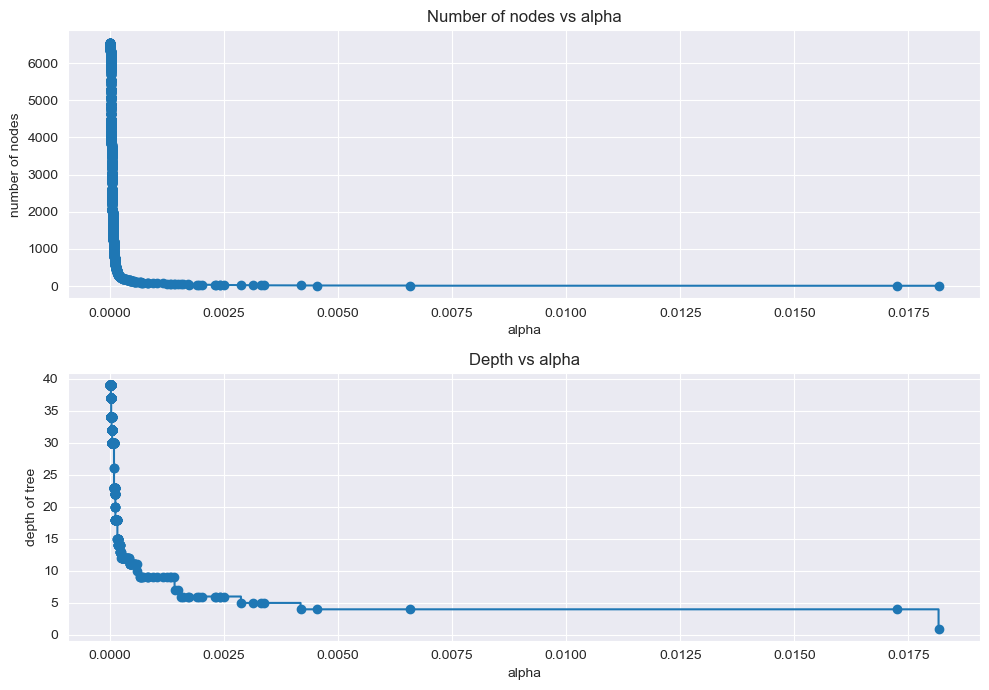

In [146]:
# show a graph with the number of nodes against the alpha scores
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Accuracy vs Alpha for training and testing sets

In [147]:
# determine the train and test sets for the alpha scores
train_scores = [clf.score(x_train6, y_train) for clf in clfs]
test_scores = [clf.score(x_test6, y_test) for clf in clfs]

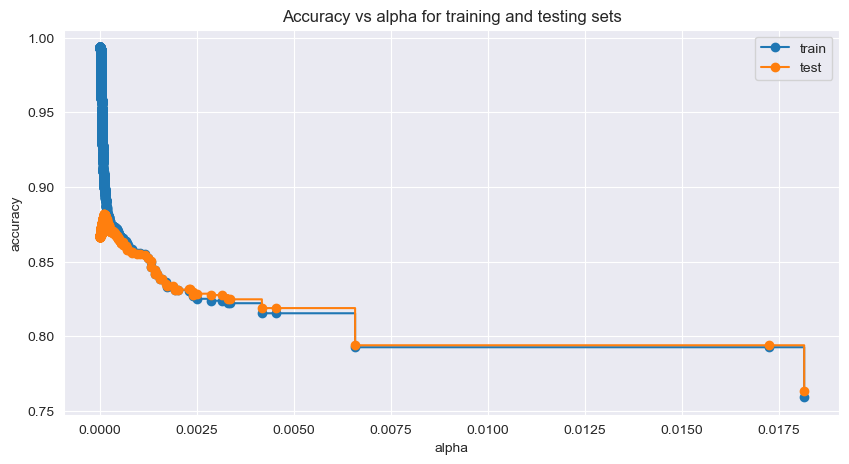

In [148]:
# Show the graph with the accuracy and alphas for the train and test scores
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [149]:
# show the alpha value and accuracy for the test and train data sets for the best model
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(x_train6, y_train))
print('Test accuracy of best model: ',best_model.score(x_test6, y_test))

DecisionTreeClassifier(ccp_alpha=0.0001232150826309692, random_state=1)
Training accuracy of best model:  0.8997321991178324
Test accuracy of best model:  0.8816502802536066


In [150]:
# determine the recall scores for the train set
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(x_train6)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [151]:
# determine the recall scores for the test set
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(x_test6)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

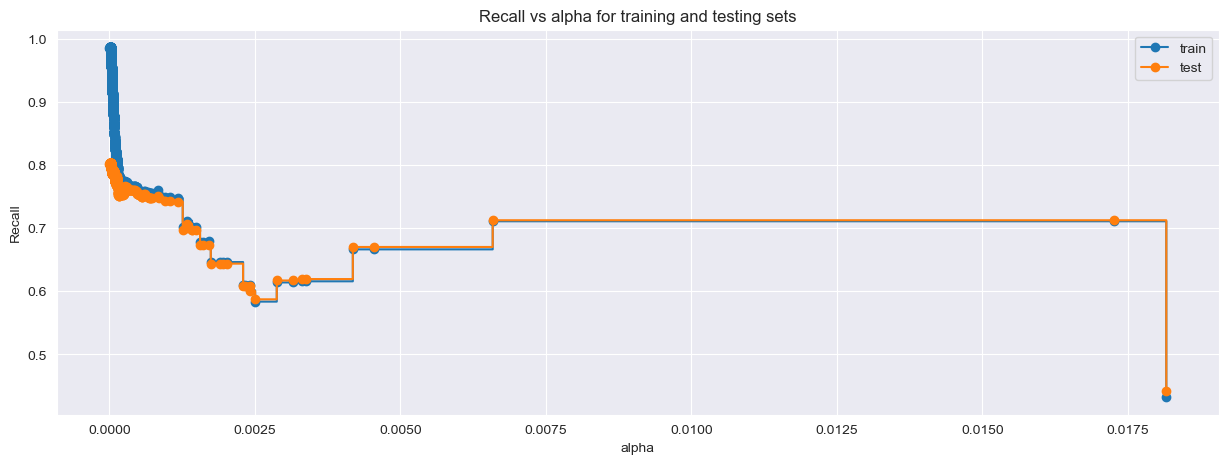

In [152]:
# create a graph from the scores determined above
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [153]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=1.8176530463865078e-05, random_state=1)


### Confusion Matrix- post-pruned decision tree

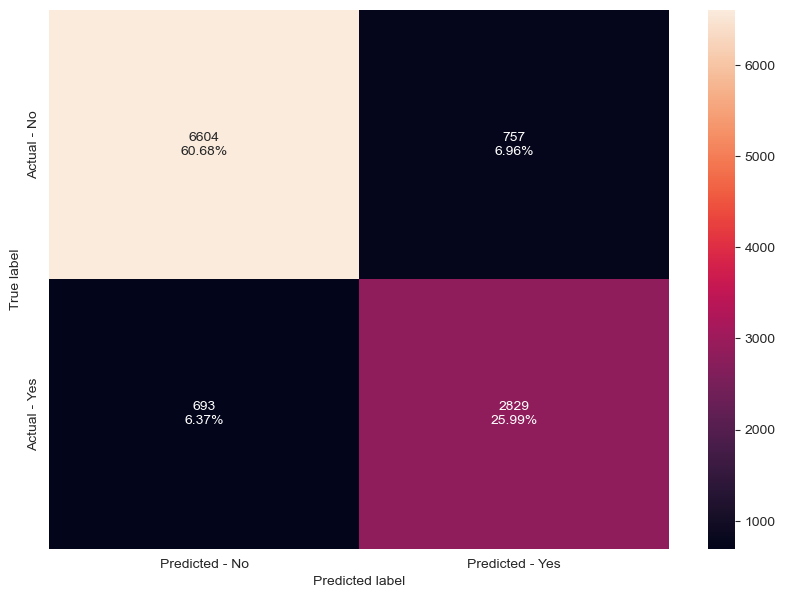

In [154]:
# run a confusion matrix
make_confusion_matrix(best_model,y_test)

In [155]:
# Recall on train and test
get_recall_score(best_model)

Recall on training set :  0.98624895372474
Recall on test set :  0.803236797274276


In [156]:
# create dataframe for model scores
Model4 = 'Decision Tree with Post-Pruning'
Train_Acc4 = 0.90
Train_Recall4 = 0.99
Test_Acc4 = 0.88
Test_Recall4 = 0.80

comparison_frame = pd.DataFrame({'Model':[Model4],
                                 'Train_Recall':[Train_Recall4], 
                                 'Test_Recall':[Test_Recall4],
                                 'Train_Accuracy':[Train_Acc4],
                                 'Test_Accuracy':[Test_Acc4]}) 
comparison_frame

Model  Train_Recall  Test_Recall  Train_Accuracy  \
0  Decision Tree with Post-Pruning          0.99          0.8             0.9   

   Test_Accuracy  
0           0.88

### Visualizing the Decision Tree

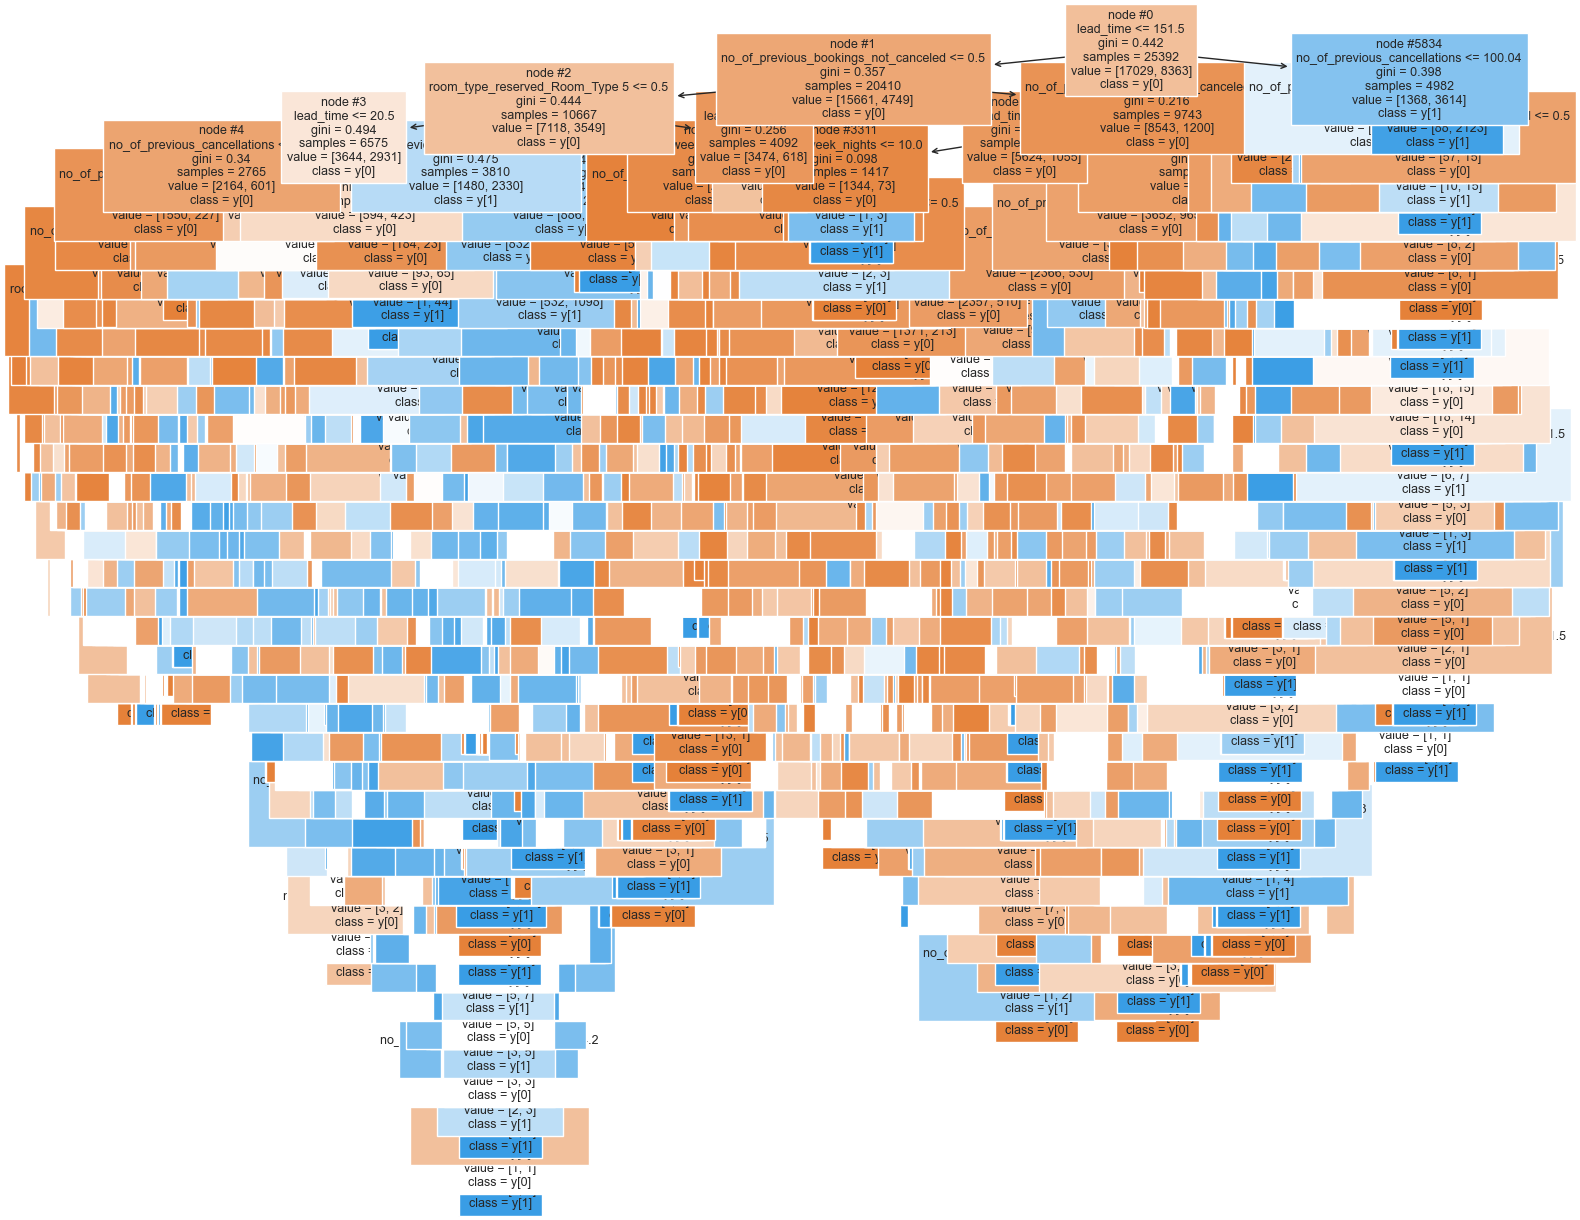

In [157]:
# present the Decision Tree
plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [158]:
# show the importance feature scores
print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = x_train6.columns).sort_values(by = 'Imp', ascending = False))

                                     Imp
lead_time                       0.394861
avg_price_per_room              0.199127
arrival_month                   0.078010
no_of_special_requests          0.068228
market_segment_type_Offline     0.059344
no_of_week_nights               0.057774
no_of_weekend_nights            0.045663
no_of_adults                    0.035116
arrival_year                    0.014326
type_of_meal_plan_Not Selected  0.009325
market_segment_type_Corporate   0.007871
room_type_reserved_Room_Type 4  0.007486
required_car_parking_space      0.006602
type_of_meal_plan_Meal Plan 2   0.005966
no_of_children                  0.005321
room_type_reserved_Room_Type 2  0.002143
room_type_reserved_Room_Type 5  0.001228
repeated_guest                  0.000845
room_type_reserved_Room_Type 6  0.000672
no_of_previous_cancellations    0.000091
room_type_reserved_Room_Type 7  0.000000
const                           0.000000


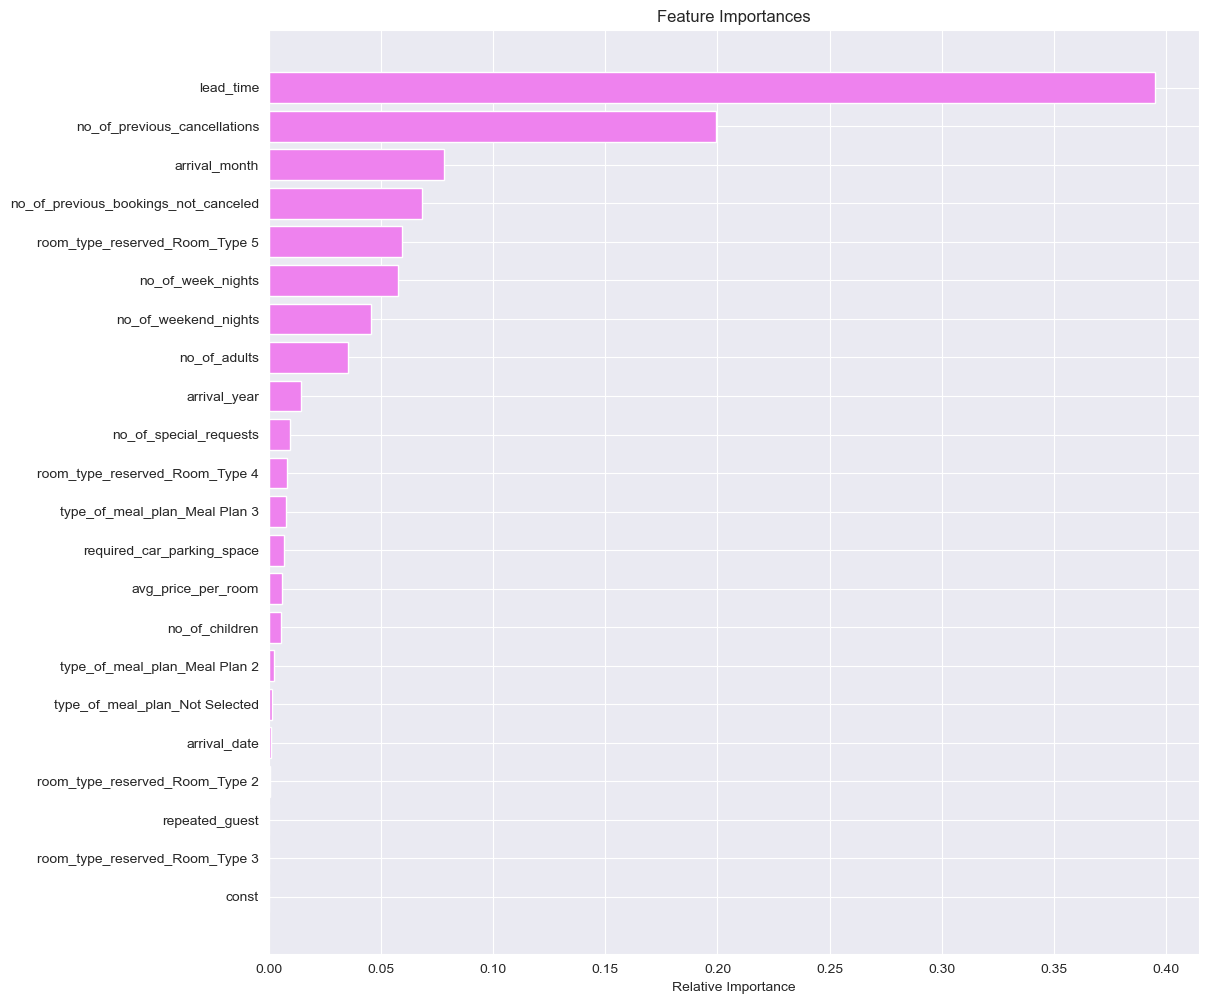

In [159]:
# present the importance feature scores in a graph
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Model Performance Comparison and Conclusions

In [160]:
# show all model scores together
comparison_frame = pd.DataFrame({'Model':[Model1, Model2, Model3, Model4],
                                 'Train_Recall':[Train_Recall1, Train_Recall2, Train_Recall3, Train_Recall4], 
                                 'Test_Recall':[Test_Recall1, Test_Recall2, Test_Recall3, Test_Recall4],
                                 'Train_Accuracy':[Train_Acc1, Train_Acc2, Train_Acc3, Train_Acc4],
                                 'Test_Accuracy':[Test_Acc1, Test_Acc2, Test_Acc3, Test_Acc4]}) 
comparison_frame

Model  Train_Recall  Test_Recall  \
0                  Initial Decision Tree Model          0.98         0.80   
1  Decision Tree with Restricted Maximum Depth          0.40         0.41   
2     Decision Tree with Hyperparameter Tuning          0.71         0.71   
3              Decision Tree with Post-Pruning          0.99         0.80   

   Train_Accuracy  Test_Accuracy  
0            0.99           0.86  
1            0.77           0.78  
2            0.79           0.79  
3            0.90           0.88

#### Observations:

* Initial Decision Tree Model overfits the training data, which causes a decrease in the testing accuracy
* Decision Tree with Restricted Maximum Depth has a fine accuracy score and they are very similar scores, but the recall scores for both the train and test data sets are pretty low
* Decision Tree with Hyperparameter Tuning has lower accuracy scores and average recall scores compared to the other trees, but the accuracy and recall between the train and test data is identical to the second decimal
* Decision Tree with Post-Pruning has similar and fairly high train and test accuracy scores, but the train recall score is significantly higher than the test recall score

## Conclusion:

* While it looks like it could be an overfitted model when visualizing the Decision Tree, Decision Tree with Post-Pruning would be the best model for this dataset. It has high accuracy for both the train and test set and, although the test recall score is much lower than the train recall score, it is still higher than the other models.

* The best model, Decision Tree with Post-Pruning, has an 88% chance to correctly predict whether or not a guest will cancel
* Throughout all of the models, Lead Time had the highest impact by a significant margin on predicting whether a guest will cancel
* The decision tree shows that guests who book their stays less than 151.50 days out, spend less than than 100.04 Euros on a room, or make an average of fewer than 0.5 special requests are more likely to cancel. 

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

* As a shorter Lead Time was seen the have the highest impact on cancellations, it is recommended to give discounts for guests who book further than 5 months out. 
* It is also recommended to offer increased refunds for guests who book further than 5 months out as these guests have a lower likelihood of cancelling
* When a guest is booking a stay at the hotel, make it known to the guest that the hotel recommends making special requests to create a more personalized and comfortable stay, as making even one special request greatly decreases the likelihood that that the guest will cancel
* Offer future discounts to guests who do not cancel. This will incentivise repeat guests not to cancel and will encourage single visit guests to become repeat guests. 
